# Import Library

Pada bagian ini, seluruh library yang dibutuhkan untuk analisis data, visualisasi, pemrosesan teks, pembuatan model machine learning, dan evaluasi dimuat.
Library seperti `pandas`, `numpy`, `matplotlib`, `seaborn`, `sklearn`, `tensorflow`, dan `textblob` merupakan komponen utama dalam proses ini.


In [ ]:
# 📊 Analisis Data
import pandas as pd
import numpy as np

# 📈 Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# 🧹 Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 📐 Evaluasi & Similarity
from sklearn.metrics.pairwise import cosine_similarity

# 🧠 Machine Learning - Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import nltk
import joblib
# 📝 NLP (Text Processing)
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

# 📂 Google Colab
from google.colab import files


### Persiapan Resource NLP untuk TextBlob & NLTK

Mengunduh korpus dan tagger yang dibutuhkan oleh library NLTK dan TextBlob untuk analisis teks, seperti tokenisasi, part-of-speech tagging, dan klasifikasi gramatikal.

In [ ]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('tagsets')
!python -m textblob.download_corpora

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


# Upload Dataset ke Colab

Mengunggah file dataset dari komputer lokal ke lingkungan Google Colab menggunakan files.upload(). Data ini akan digunakan untuk proses analisis dan pembangunan sistem rekomendasi.

In [ ]:
# Meng-upload file
uploaded = files.upload()

Saving package_tourism.csv to package_tourism.csv
Saving tourism_rating.csv to tourism_rating.csv
Saving tourism_with_id.csv to tourism_with_id.csv
Saving user.csv to user.csv


# Read Dataset

Membaca seluruh file CSV yang telah diunggah ke dalam DataFrame menggunakan pandas.

In [ ]:
# Membaca dataset
df_user = pd.read_csv('user.csv')
df_tourism = pd.read_csv('tourism_with_id.csv')
df_rating = pd.read_csv('tourism_rating.csv')
df_package = pd.read_csv('package_tourism.csv')

### Menampilkan Cuplikan Dataset

Menampilkan 5 baris pertama dari setiap DataFrame untuk mendapatkan gambaran awal isi dataset:

In [ ]:
print("User Dataset:")
print(df_user.head(), "\n")

print("Tourism Dataset (with ID):")
print(df_tourism.head(), "\n")

print("Tourism Rating Dataset:")
print(df_rating.head(), "\n")

print("Package Tourism Dataset:")
print(df_package.head(), "\n")

User Dataset:
   User_Id                   Location  Age
0        1      Semarang, Jawa Tengah   20
1        2         Bekasi, Jawa Barat   21
2        3        Cirebon, Jawa Barat   23
3        4         Bekasi, Jawa Barat   21
4        5  Lampung, Sumatera Selatan   20 

Tourism Dataset (with ID):
   Place_Id                         Place_Name  \
0         1                   Monumen Nasional   
1         2                           Kota Tua   
2         3                      Dunia Fantasi   
3         4  Taman Mini Indonesia Indah (TMII)   
4         5           Atlantis Water Adventure   

                                         Description       Category     City  \
0  Monumen Nasional atau yang populer disingkat d...         Budaya  Jakarta   
1  Kota tua di Jakarta, yang juga bernama Kota Tu...         Budaya  Jakarta   
2  Dunia Fantasi atau disebut juga Dufan adalah t...  Taman Hiburan  Jakarta   
3  Taman Mini Indonesia Indah merupakan suatu kaw...  Taman Hiburan  Jakarta  

#### User Dataset
- User_Id: ID unik untuk setiap pengguna.
- Location: Lokasi atau kota tempat tinggal pengguna.
- Age: Usia pengguna.


#### Tourism Dataset
- Place_Id: ID unik untuk setiap tempat wisata.
- Place_Name: Nama tempat wisata.
- Description: Deskripsi tempat wisata.
- Category: Kategori tempat wisata (misalnya: Budaya, Alam, dll).
- City: Kota tempat wisata berada.
- Price: Harga tiket masuk tempat wisata.
- Rating: Rating rata-rata dari pengguna untuk tempat wisata.
- Time_Minutes: Lama waktu yang diperlukan untuk mengunjungi tempat wisata (dalam menit).
- Coordinate: Koordinat GPS tempat wisata.
- Lat: Latitude koordinat geografis.
- Long: Longitude koordinat geografis.
- Unnamed: 11: Kolom tidak terpakai, sebaiknya dihapus.
- Unnamed: 12: Kolom tidak terpakai, sebaiknya dihapus.


#### Tourism Rating Dataset
- User_Id: ID pengguna yang memberikan rating.
- Place_Id: ID tempat wisata yang diberikan rating.
- Place_Ratings: Rating yang diberikan oleh pengguna untuk tempat wisata.

#### Package Tourism Dataset
- Package: ID unik untuk setiap paket wisata.
- City: Kota yang tercakup dalam paket wisata.
- Place_Tourism1: Tempat wisata pertama dalam paket.
- Place_Tourism2: Tempat wisata kedua dalam paket.
- Place_Tourism3: Tempat wisata ketiga dalam paket.
- Place_Tourism4: Tempat wisata keempat dalam paket (nilai missing).
- Place_Tourism5: Tempat wisata kelima dalam paket (nilai missing).



### Statistik Deskriptif Dataset User

Kode ini menampilkan statistik deskriptif dari dataset df_user, mencakup semua kolom (include='all'), baik numerik maupun kategorikal. Informasi yang ditampilkan meliputi:
- Count (jumlah entri tidak null)
- Unique (jumlah nilai unik untuk kolom kategorikal)
- Top (nilai yang paling sering muncul)
- Freq (frekuensi dari nilai yang paling sering muncul)
- Mean, Std, Min, Max (untuk kolom numerik)

Tujuannya adalah untuk memahami karakteristik dasar dari data pengguna.

In [ ]:
df_user.describe(include='all')

,User_Id,Location,Age
count,300.000000,300,300.000000
unique,NaN,28,NaN
top,NaN,"Bekasi, Jawa Barat",NaN
freq,NaN,39,NaN
mean,150.500000,NaN,28.700000
std,86.746758,NaN,6.393716
min,1.000000,NaN,18.000000
25%,75.750000,NaN,24.000000
50%,150.500000,NaN,29.000000
75%,225.250000,NaN,34.000000


### Statistik Deskriptif Dataset Tempat Wisata

In [ ]:
df_tourism.describe(include='all')

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437,437,437,437,437.000000,437.000000,205.000000,437,437.000000,437.000000,0.0,437.000000
unique,NaN,437,437,6,5,NaN,NaN,NaN,437,NaN,NaN,NaN,NaN
top,NaN,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Taman Hiburan,Yogyakarta,NaN,NaN,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",NaN,NaN,NaN,NaN
freq,NaN,1,1,135,126,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
mean,219.000000,NaN,NaN,NaN,NaN,24652.173913,4.442792,82.609756,NaN,-7.095438,109.160142,NaN,219.000000
std,126.295289,NaN,NaN,NaN,NaN,66446.374709,0.208587,52.872339,NaN,0.727241,1.962848,NaN,126.295289
min,1.000000,NaN,NaN,NaN,NaN,0.000000,3.400000,10.000000,NaN,-8.197894,103.931398,NaN,1.000000
25%,110.000000,NaN,NaN,NaN,NaN,0.000000,4.300000,45.000000,NaN,-7.749590,107.578369,NaN,110.000000
50%,219.000000,NaN,NaN,NaN,NaN,5000.000000,4.500000,60.000000,NaN,-7.020524,110.237468,NaN,219.000000
75%,328.000000,NaN,NaN,NaN,NaN,20000.000000,4.600000,120.000000,NaN,-6.829411,110.431869,NaN,328.000000


### Statistik Deskriptif Dataset Rating Wisata

In [ ]:
df_rating.describe(include='all')

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


# EDA (Exploratory Data Analysis)
Exploratory Data Analysis (EDA) adalah tahap awal dalam proses analisis data di mana kita mengeksplorasi dan memahami karakteristik data secara menyeluruh sebelum membangun model machine learning. Tujuan utamanya adalah:
- Memahami struktur dan isi dataset.
- Mendeteksi masalah dalam data seperti missing values, duplikat, atau outlier.
- Mengidentifikasi pola, hubungan antar fitur, dan distribusi data.
- Menyediakan dasar pengambilan keputusan untuk preprocessing atau pemilihan model.

## 1. Informasi Umum Dataset

Pada bagian ini ditampilkan informasi struktural dari setiap dataset, yaitu:
- df_user: Dataset pengguna — menunjukkan jumlah entri (baris), tipe data setiap kolom, dan jumlah non-null values.
- df_tourism: Dataset tempat wisata — berisi data tentang destinasi wisata beserta ID dan kategorinya.
- df_rating: Dataset rating pariwisata — mencakup informasi tentang rating yang diberikan pengguna untuk tempat wisata tertentu.
- df_package: Dataset paket wisata — menyimpan informasi tentang paket wisata yang tersedia.

Dengan fungsi .info(), kita dapat mengecek:
- Apakah ada missing values
- Tipe data dari tiap kolom
- Jumlah total entry per dataset

In [ ]:
# Menampilkan informasi umum dari setiap dataset
print("Info User Dataset:")
print(df_user.info(), "\n")

print("Info Tourism Dataset:")
print(df_tourism.info(), "\n")

print("Info Tourism Rating Dataset:")
print(df_rating.info(), "\n")

print("Info Package Tourism Dataset:")
print(df_package.info(), "\n")

Info User Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB
None 

Info Tourism Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-nul

## 2. Pembersihan Kolom Tidak Relevan

Pada tahap ini, dilakukan penghapusan kolom-kolom yang tidak diperlukan atau tidak memiliki nilai informasi penting untuk analisis dan pemodelan. Kolom yang dihapus antara lain:
- Coordinate
- Unnamed: 11
- Unnamed: 12

Kolom-kolom ini berasal dari hasil ekspor file CSV yang kurang bersih atau tidak relevan dengan tujuan analisis. Penghapusan dilakukan secara otomatis untuk setiap dataset (user, tourism, rating, dan package) jika kolom tersebut ditemukan.

In [ ]:
# Daftar kolom yang ingin dihapus
columns_to_drop = ['Coordinate', 'Unnamed: 11', 'Unnamed: 12']

# Hapus kolom jika kolom tersebut ada
for df in [df_user, df_tourism, df_rating, df_package]:
    df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)



## 3. Pengecekan Missing Values

Pada tahap ini, dilakukan pengecekan untuk melihat apakah ada nilai yang hilang (missing values) di dalam setiap dataset. Missing values dapat mempengaruhi kualitas model, oleh karena itu perlu dilakukan penanganan lebih lanjut seperti pengisian atau penghapusan data yang hilang.

Hasil pengecekan missing values akan menunjukkan jumlah missing values di setiap kolom pada dataset df_package, df_rating, df_tourism, dan df_user. Ini akan memberi gambaran tentang kualitas data yang dimiliki.

In [ ]:
print("Missing values in df_package:\n", df_package.isnull().sum())
print("\nMissing values in df_rating:\n", df_rating.isnull().sum())
print("\nMissing values in df_tourism:\n", df_tourism.isnull().sum())
print("\nMissing values in df_user:\n", df_user.isnull().sum())



Missing values in df_package:
 Package            0
City               0
Place_Tourism1     0
Place_Tourism2     0
Place_Tourism3     0
Place_Tourism4    34
Place_Tourism5    61
dtype: int64

Missing values in df_rating:
 User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

Missing values in df_tourism:
 Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Lat               0
Long              0
dtype: int64

Missing values in df_user:
 User_Id     0
Location    0
Age         0
dtype: int64


## 4. Menangani Duplikat Data
Di bawah ini adalah pemeriksaan jumlah data duplikat untuk masing-masing dataset. Duplikat dapat mempengaruhi kualitas analisis dan model, sehingga penting untuk mengidentifikasinya dan mengambil tindakan yang sesuai.

In [ ]:
print("Duplicates in df_package:", df_package.duplicated().sum())
print("Duplicates in df_rating:", df_rating.duplicated().sum())
print("Duplicates in df_tourism:", df_tourism.duplicated().sum())
print("Duplicates in df_user:", df_user.duplicated().sum())


Duplicates in df_package: 0
Duplicates in df_rating: 79
Duplicates in df_tourism: 0
Duplicates in df_user: 0


## 5. Visualisasi Distribusi Fitur Numerik
Bagian ini bertujuan untuk memvisualisasikan distribusi fitur numerik yang terdapat pada setiap dataset untuk membantu memahami data lebih baik.
- numeric_dfs: List ini berisi DataFrame yang hanya mencakup kolom numerik dari setiap dataset.
- titles: Daftar berisi judul untuk setiap plot yang akan ditampilkan, sesuai dengan dataset terkait.
- Loop untuk plot histogram: Setiap dataset divisualisasikan menggunakan histogram dengan 20 bin untuk menunjukkan distribusi fitur numerik yang ada. tight_layout() digunakan untuk memastikan bahwa label dan elemen plot tidak saling tumpang tindih.

Visualisasi ini membantu kita memahami sebaran data numerik, serta mendeteksi adanya pencilan atau pola distribusi tertentu di setiap dataset.

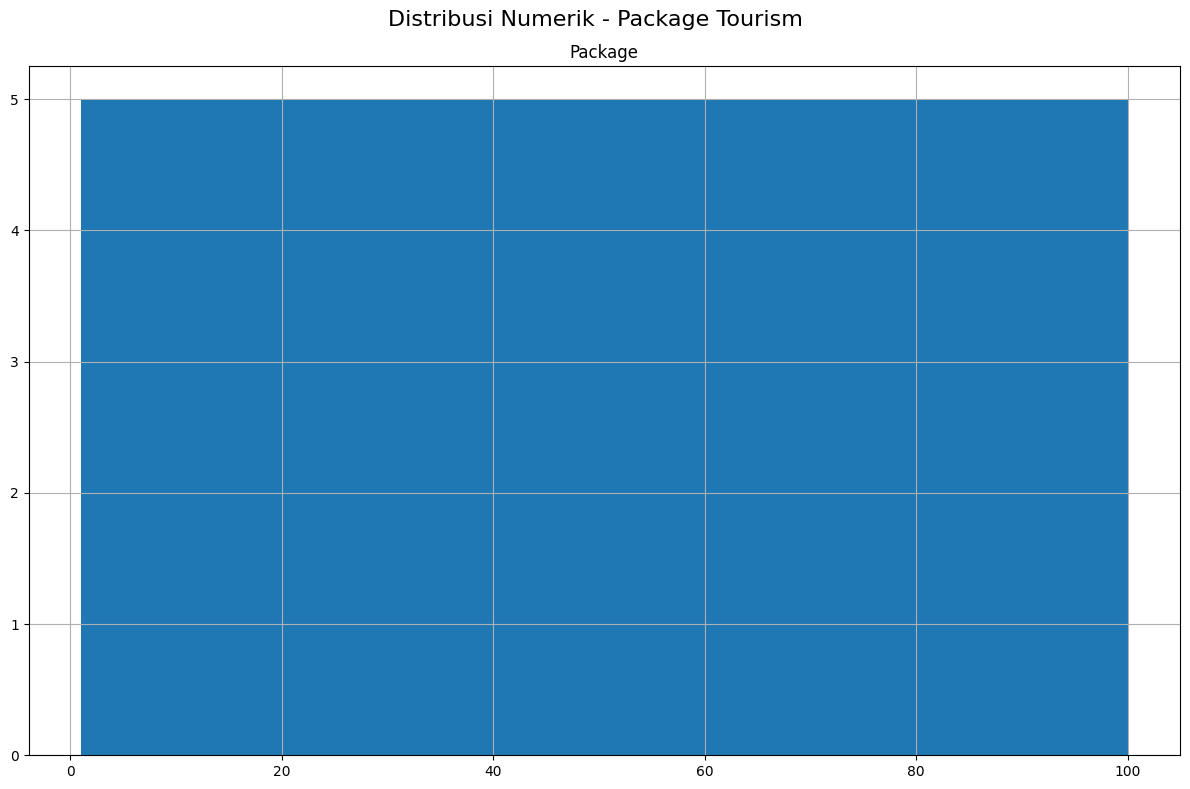

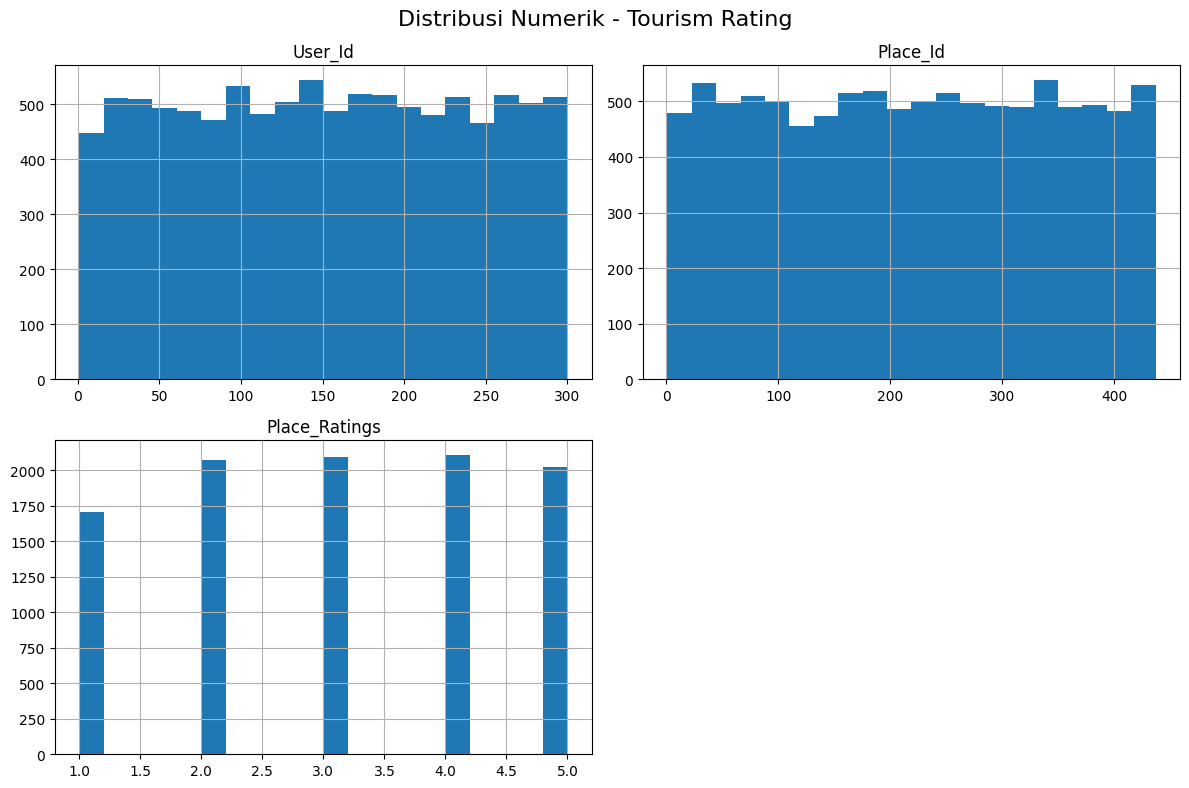

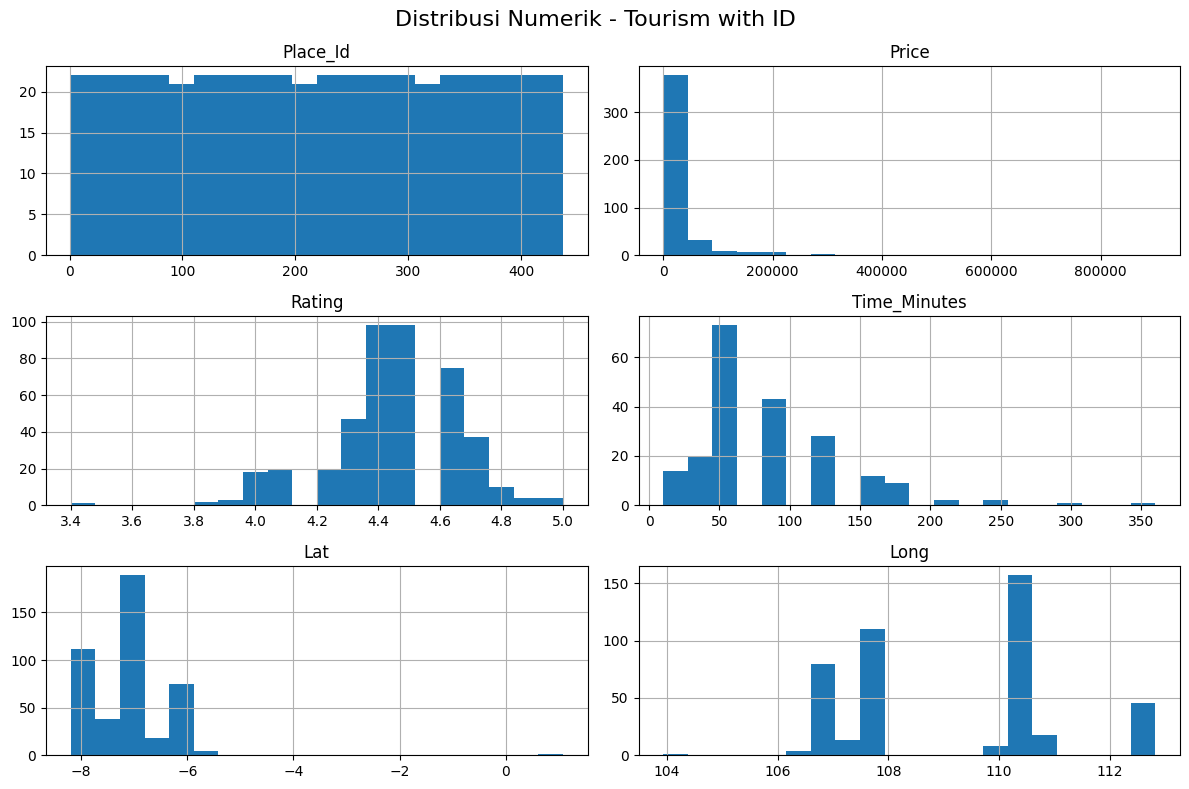

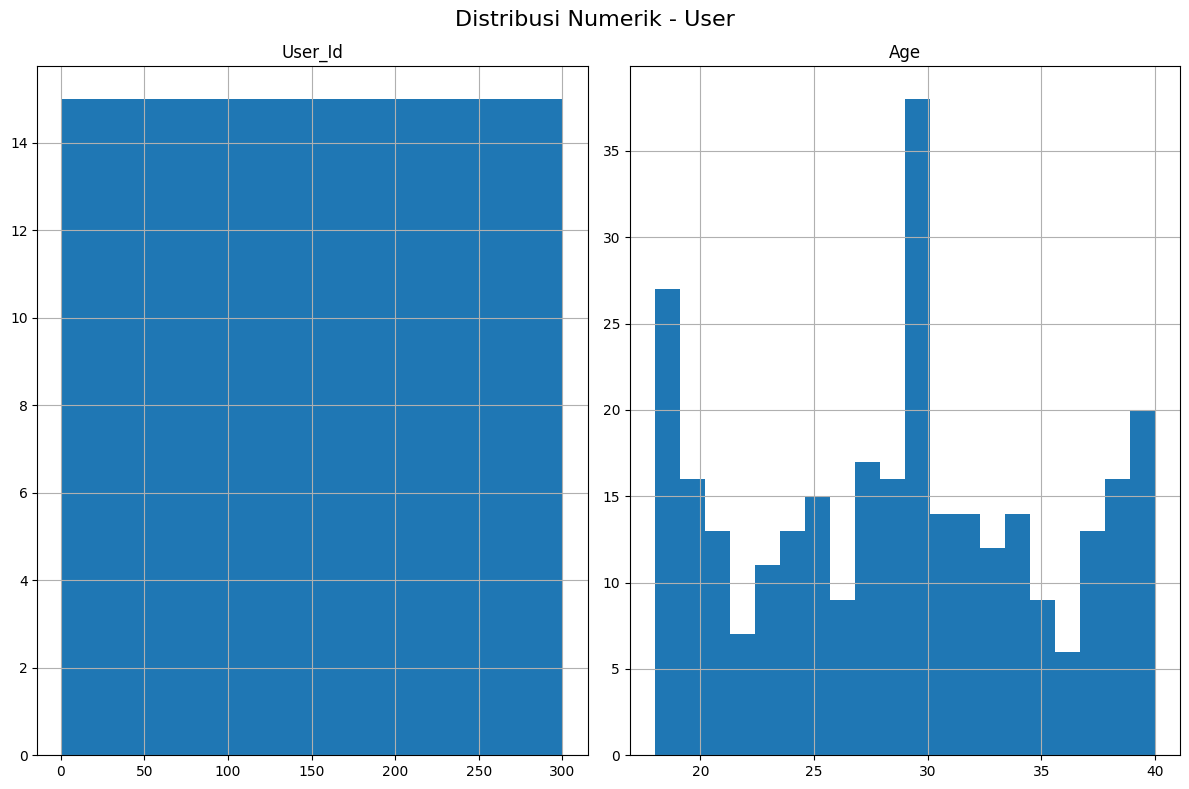

In [ ]:
# Buat list DataFrame numerik
numeric_dfs = [
    df_package.select_dtypes(include='number'),
    df_rating.select_dtypes(include='number'),
    df_tourism.select_dtypes(include='number'),
    df_user.select_dtypes(include='number')
]

# Judul plot untuk setiap DataFrame
titles = ['Package Tourism', 'Tourism Rating', 'Tourism with ID', 'User']

# Loop untuk plotting histogram setiap dataset
for df, title in zip(numeric_dfs, titles):
    df.hist(bins=20, figsize=(12, 8))
    plt.suptitle(f'Distribusi Numerik - {title}', fontsize=16)
    plt.tight_layout()
    plt.show()


## 6. Visualisasi Pairplot untuk Fitur Numerik
Bagian ini berfungsi untuk memvisualisasikan hubungan antar fitur numerik menggunakan pairplot. Pairplot memungkinkan kita untuk melihat distribusi dari setiap fitur dan korelasi antar fitur dalam dataset.

Menampilkan pairplot untuk: Package Tourism


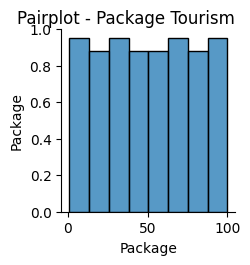

Menampilkan pairplot untuk: Tourism Rating


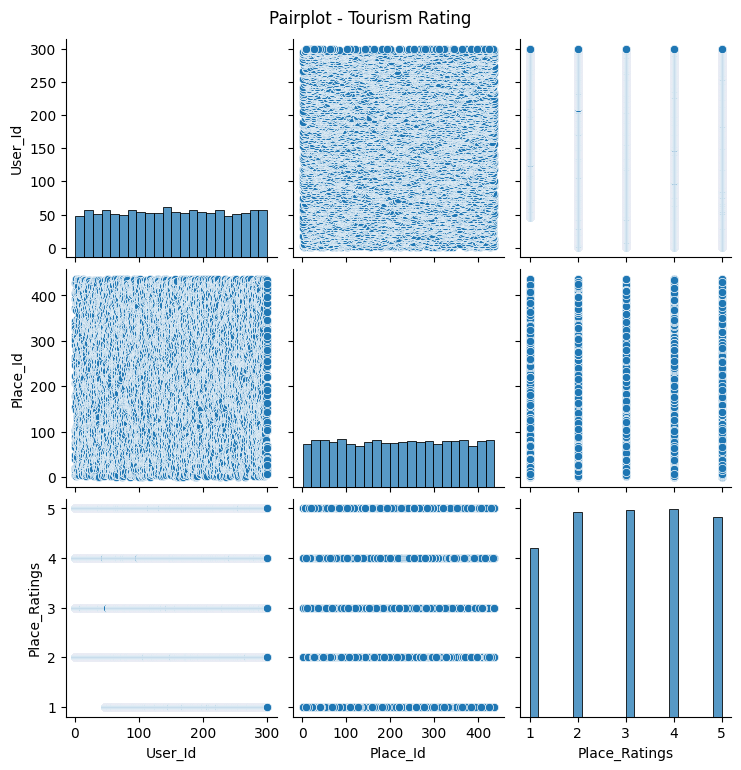

Pairplot dilewati untuk: Tourism with ID (jumlah kolom numerik > 5)
Menampilkan pairplot untuk: User


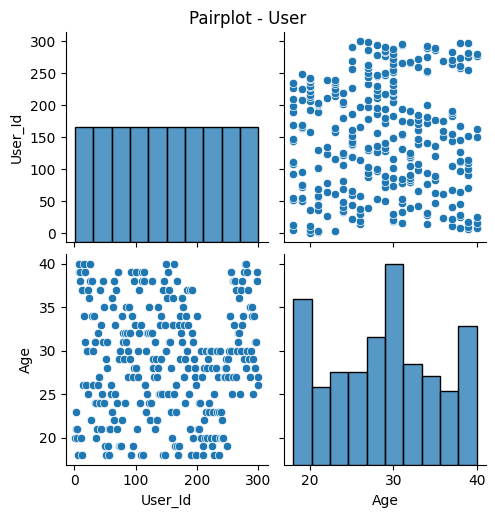

In [ ]:
# Ambil hanya fitur numerik dari setiap DataFrame
numeric_dfs = [
    df_package.select_dtypes(include='number'),
    df_rating.select_dtypes(include='number'),
    df_tourism.select_dtypes(include='number'),
    df_user.select_dtypes(include='number')
]

titles = ['Package Tourism', 'Tourism Rating', 'Tourism with ID', 'User']

# Plot pairplot hanya jika jumlah kolom numerik <= 5
for df, title in zip(numeric_dfs, titles):
    if df.shape[1] <= 5:  # batas maksimal kolom untuk pairplot
        print(f"Menampilkan pairplot untuk: {title}")
        sns.pairplot(df)
        plt.suptitle(f'Pairplot - {title}', y=1.02)
        plt.show()
    else:
        print(f"Pairplot dilewati untuk: {title} (jumlah kolom numerik > 5)")


Penjelasan:
- numeric_dfs: List ini berisi DataFrame yang hanya mencakup kolom numerik dari setiap dataset.
- titles: Daftar berisi judul untuk setiap plot yang akan ditampilkan, sesuai dengan dataset yang bersangkutan.
- Pairplot: Digunakan untuk memvisualisasikan hubungan antar fitur numerik. Namun, hanya DataFrame dengan kurang dari 5 kolom numerik yang diproses menggunakan pairplot, untuk mencegah plot yang terlalu ramai dan sulit dibaca.

Jika dataset memiliki lebih dari 5 kolom numerik, pairplot akan dilewati untuk menjaga visualisasi tetap relevan dan tidak membingungkan.

## 7. Visualisasi Heatmap Korelasi
Bagian ini bertujuan untuk menampilkan heatmap korelasi antar fitur numerik dalam setiap dataset. Heatmap korelasi memungkinkan kita untuk dengan cepat mengidentifikasi hubungan antar variabel, dengan warna yang menunjukkan tingkat korelasi antara fitur-fitur tersebut.

Heatmap dilewati untuk: Package Tourism (jumlah kolom numerik terlalu sedikit)


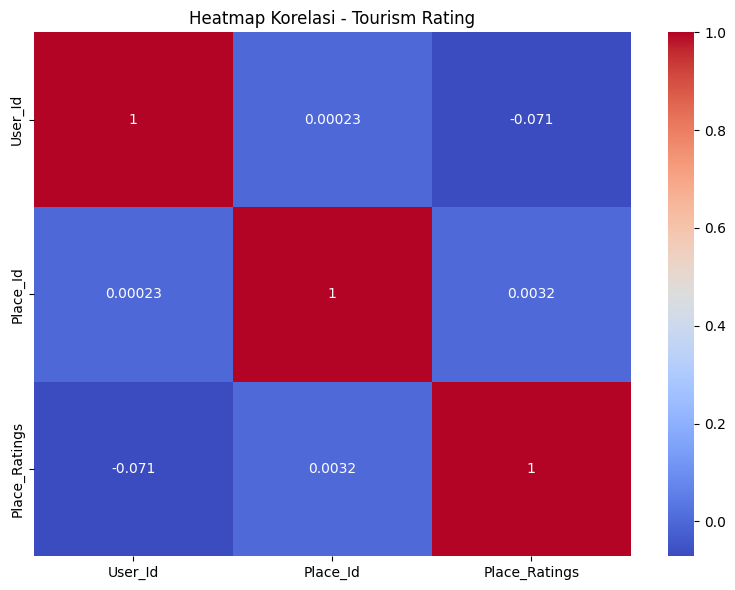

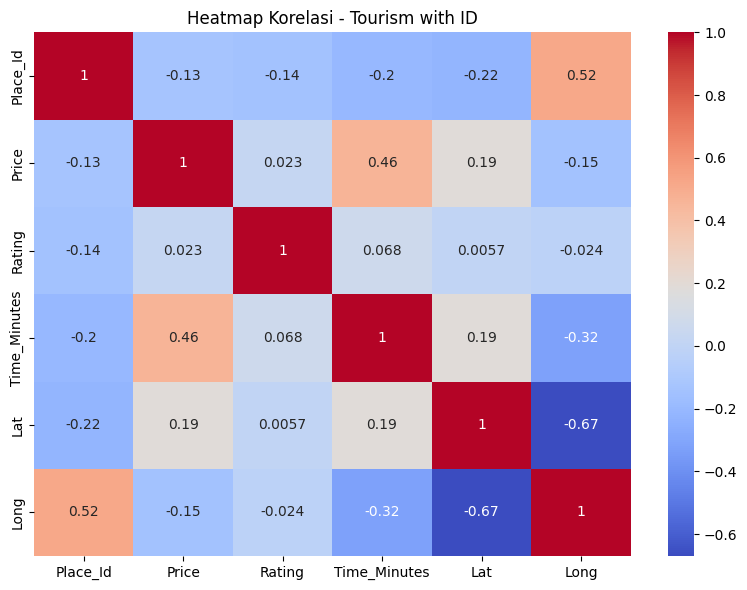

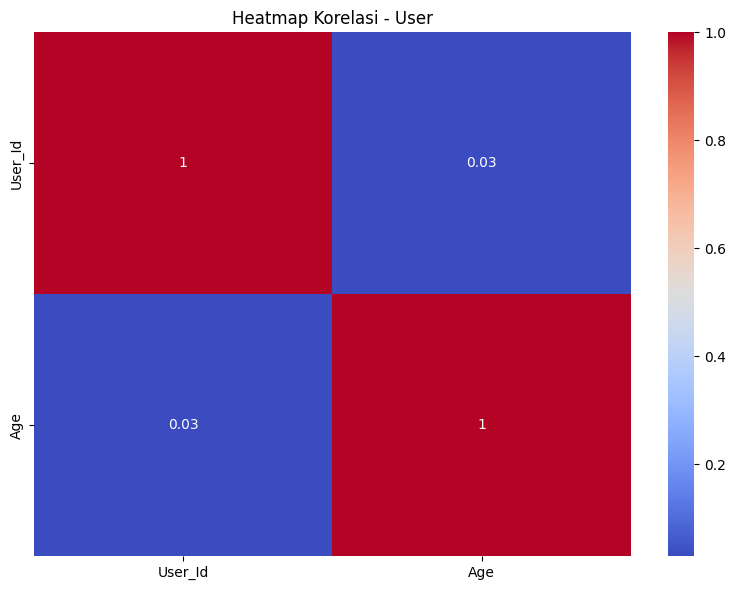

In [ ]:
# Ambil hanya kolom numerik dari masing-masing dataset
numeric_dfs = [
    df_package.select_dtypes(include='number'),
    df_rating.select_dtypes(include='number'),
    df_tourism.select_dtypes(include='number'),
    df_user.select_dtypes(include='number')
]

titles = ['Package Tourism', 'Tourism Rating', 'Tourism with ID', 'User']

# Tampilkan heatmap korelasi jika kolom numerik lebih dari 1
for df, title in zip(numeric_dfs, titles):
    if df.shape[1] > 1:
        plt.figure(figsize=(8, 6))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
        plt.title(f'Heatmap Korelasi - {title}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Heatmap dilewati untuk: {title} (jumlah kolom numerik terlalu sedikit)")


### Penjelasan:
- numeric_dfs: List ini berisi DataFrame yang hanya mencakup kolom numerik dari setiap dataset.
- titles: Daftar yang berisi judul untuk setiap plot yang sesuai dengan dataset yang bersangkutan.
- Heatmap: Digunakan untuk menggambarkan korelasi antar fitur numerik. Setiap sel pada heatmap mewakili korelasi antara dua fitur numerik. Korelasi positif ditandai dengan warna yang lebih terang, sementara korelasi negatif ditandai dengan warna yang lebih gelap. Jika dataset hanya memiliki satu kolom numerik, heatmap akan dilewati.


### Interpretasi:
- Korelasi tinggi: Jika nilai korelasi mendekati 1 atau -1, maka ada hubungan yang sangat kuat antara dua fitur.
- Korelasi rendah: Jika nilai korelasi mendekati 0, maka hubungan antar fitur sangat lemah atau hampir tidak ada.

### Manfaat:
- Membantu untuk memahami hubungan antar fitur.
- Bisa menjadi indikasi untuk pemilihan fitur atau penghapusan fitur yang sangat berkorelasi tinggi (multikolinearitas).

## 8. Visualisasi Distribusi Kategorikal
Bagian ini digunakan untuk menampilkan distribusi fitur kategorikal pada setiap dataset. Visualisasi yang digunakan berupa countplot dan barplot, untuk memberikan gambaran mengenai seberapa banyak setiap kategori muncul dalam dataset.

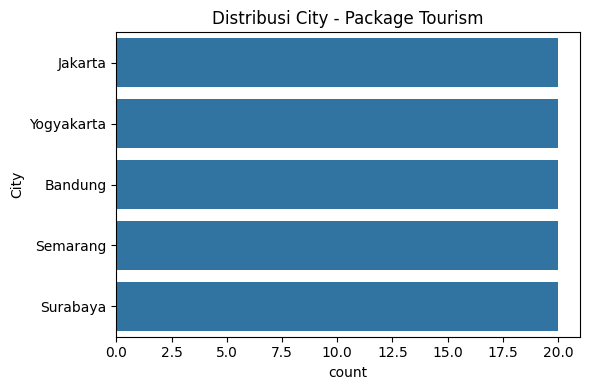

Kolom 'Place_Tourism1' di dataset 'Package Tourism' memiliki terlalu banyak kategori (89) - menampilkan top 15.


<ipython-input-16-60402905da20>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


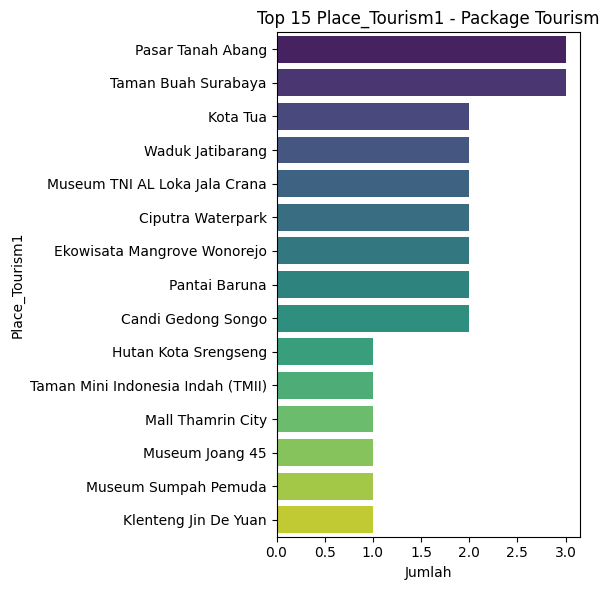

Kolom 'Place_Tourism2' di dataset 'Package Tourism' memiliki terlalu banyak kategori (93) - menampilkan top 15.


<ipython-input-16-60402905da20>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


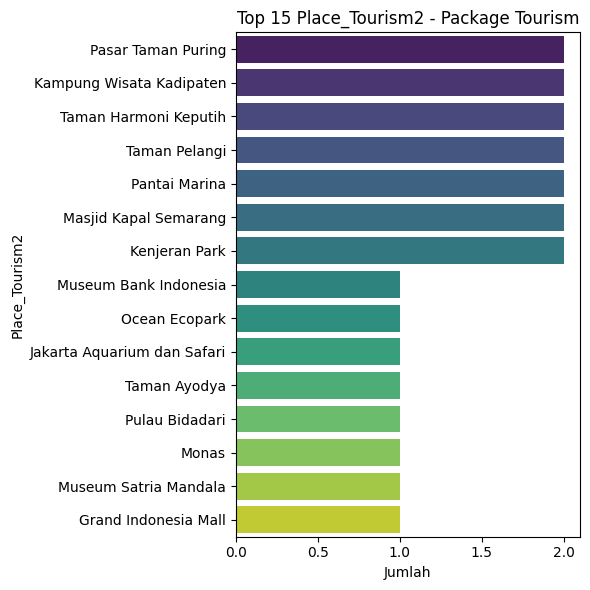

Kolom 'Place_Tourism3' di dataset 'Package Tourism' memiliki terlalu banyak kategori (92) - menampilkan top 15.


<ipython-input-16-60402905da20>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


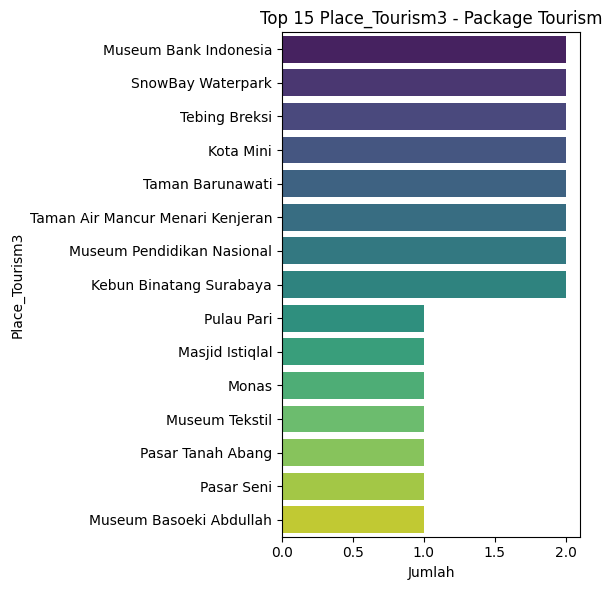

Kolom 'Place_Tourism4' di dataset 'Package Tourism' memiliki terlalu banyak kategori (61) - menampilkan top 15.


<ipython-input-16-60402905da20>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


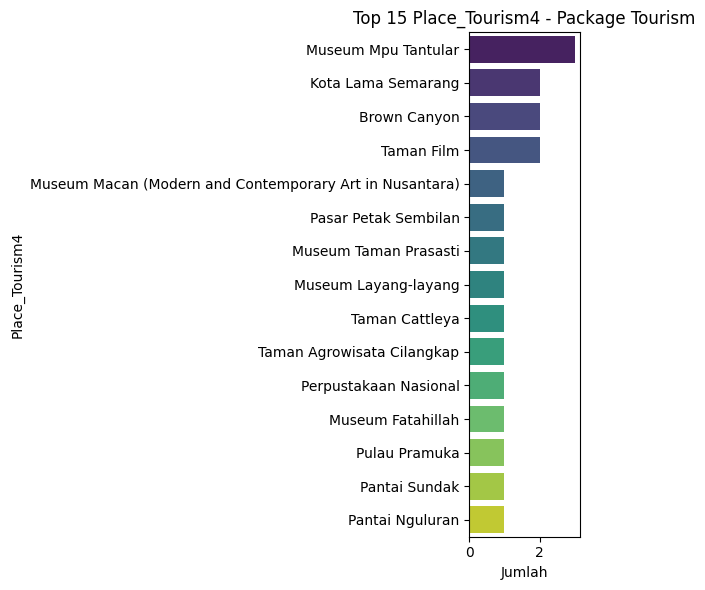

Kolom 'Place_Tourism5' di dataset 'Package Tourism' memiliki terlalu banyak kategori (38) - menampilkan top 15.


<ipython-input-16-60402905da20>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


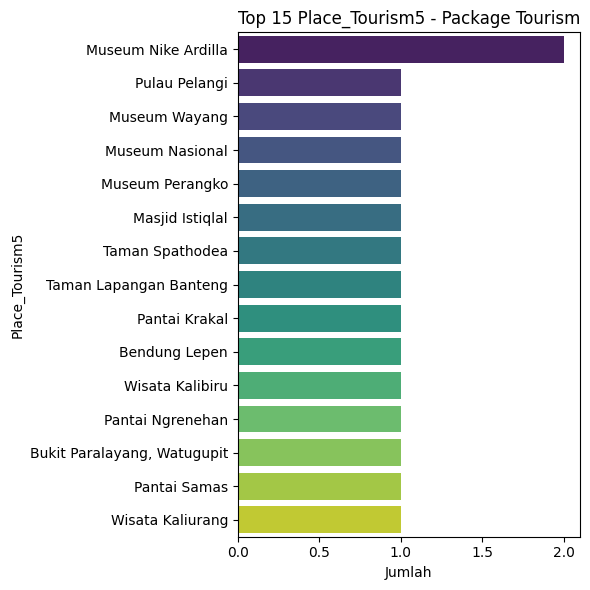

Kolom 'Place_Name' di dataset 'Tourism with ID' memiliki terlalu banyak kategori (437) - menampilkan top 15.


<ipython-input-16-60402905da20>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


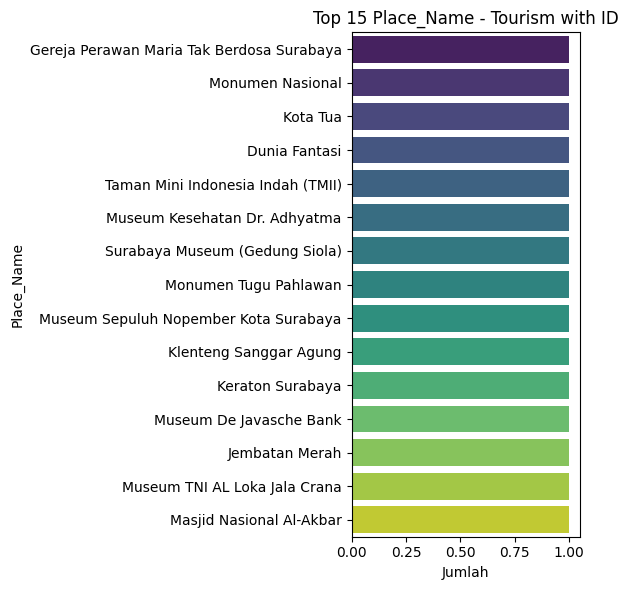

Kolom 'Description' di dataset 'Tourism with ID' memiliki terlalu banyak kategori (437) - menampilkan top 15.


<ipython-input-16-60402905da20>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')
) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-60402905da20>:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


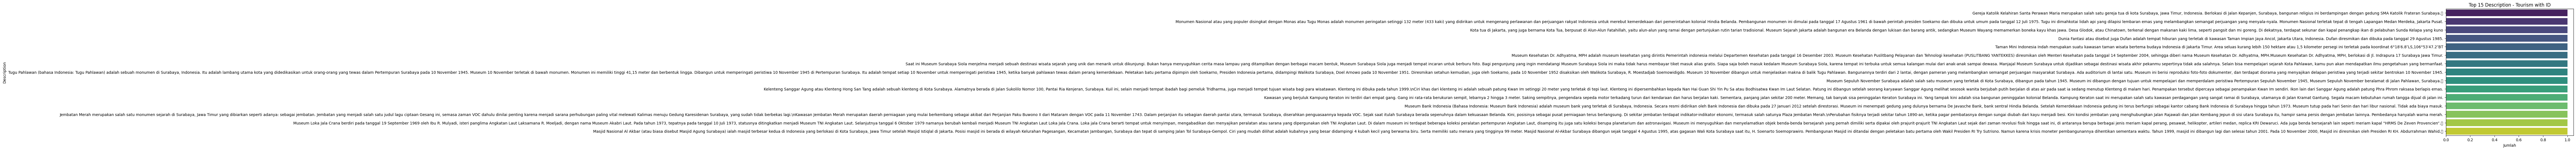

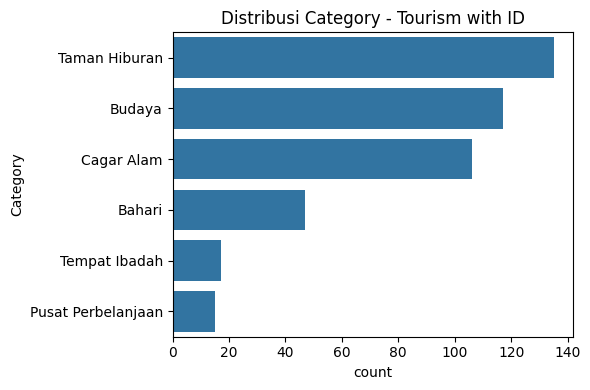

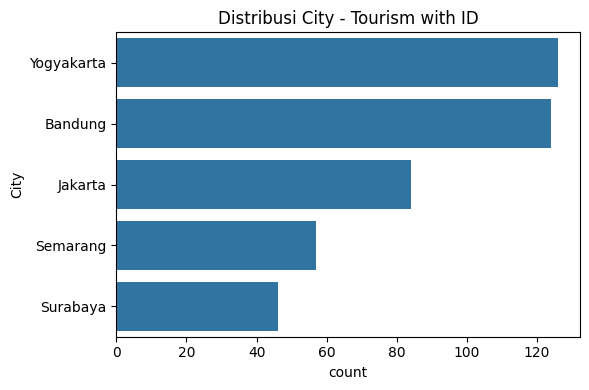

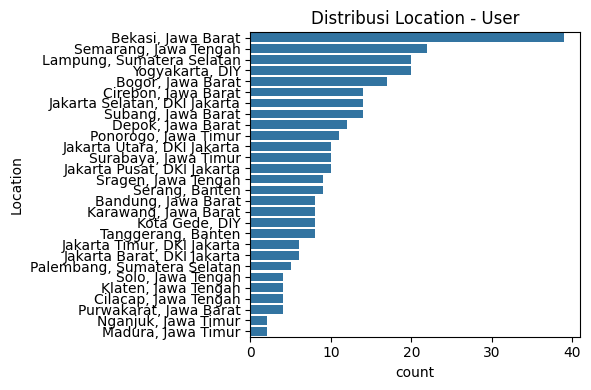

In [ ]:
categorical_dfs = [
    df_package.select_dtypes(include='object'),
    df_rating.select_dtypes(include='object'),
    df_tourism.select_dtypes(include='object'),
    df_user.select_dtypes(include='object')
]

titles = ['Package Tourism', 'Tourism Rating', 'Tourism with ID', 'User']

for df, title in zip(categorical_dfs, titles):
    for col in df.columns:
        unique_vals = df[col].nunique()
        if unique_vals < 30:
            # Visualisasi semua kategori
            plt.figure(figsize=(6, 4))
            sns.countplot(y=col, data=df, order=df[col].value_counts().index)
            plt.title(f'Distribusi {col} - {title}')
            plt.tight_layout()
            plt.show()
        else:
            # Visualisasi top 15 kategori saja
            print(f"Kolom '{col}' di dataset '{title}' memiliki terlalu banyak kategori ({unique_vals}) - menampilkan top 15.")
            top_categories = df[col].value_counts().nlargest(15)
            plt.figure(figsize=(6, 6))
            sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')
            plt.title(f'Top 15 {col} - {title}')
            plt.xlabel('Jumlah')
            plt.tight_layout()
            plt.show()



### Penjelasan:
- categorical_dfs: List yang berisi DataFrame yang hanya mencakup kolom bertipe kategorikal (tipe object) dari setiap dataset.
- titles: Daftar judul untuk setiap plot berdasarkan dataset yang bersangkutan.
- Distribusi Kategorikal: Jika kolom kategorikal memiliki kurang dari 30 kategori, kita menggunakan countplot untuk menampilkan distribusi kategori tersebut. Jika lebih dari 30 kategori, kita hanya menampilkan top 15 kategori teratas menggunakan barplot.

###  Interpretasi:
- Countplot: Digunakan untuk visualisasi frekuensi setiap kategori. Jika kolom memiliki sedikit kategori (misal: lokasi, kategori tempat wisata), countplot sangat cocok untuk menampilkan distribusinya.
- Barplot: Digunakan jika jumlah kategori lebih banyak. Menampilkan 15 kategori teratas berdasarkan frekuensi kemunculan.

### Manfaat:
- Membantu memahami distribusi data kategorikal dan memeriksa ketidakseimbangan kelas pada kolom kategorikal.
- Memberikan wawasan untuk memperbaiki data seperti kategori yang jarang muncul (outlier kategorikal), atau memilih fitur kategorikal mana yang penting untuk model.

## 9. Statistik Deskriptif Fitur Kategorikal
Bagian ini akan menampilkan statistik deskriptif untuk kolom-kolom bertipe kategorikal (tipe data object) di setiap dataset. Statistik deskriptif ini memberikan informasi tentang distribusi nilai dalam kolom kategorikal.

In [ ]:
# Statistik deskriptif fitur kategorikal
for df, title in zip(categorical_dfs, titles):
    print(f"Statistik deskriptif fitur kategorikal - {title}:\n")
    # Tambahkan cek untuk memastikan DataFrame tidak kosong (memiliki kolom)
    if not df.empty and df.shape[1] > 0:
        print(df.describe(include='object'), "\n")
    else:
        print(f"DataFrame '{title}' tidak memiliki kolom bertipe 'object'.")
        print("\n")


Statistik deskriptif fitur kategorikal - Package Tourism:

           City     Place_Tourism1      Place_Tourism2         Place_Tourism3  \
count       100                100                 100                    100   
unique        5                 89                  93                     92   
top     Jakarta  Pasar Tanah Abang  Pasar Taman Puring  Museum Bank Indonesia   
freq         20                  3                   2                      2   

             Place_Tourism4       Place_Tourism5  
count                    66                   39  
unique                   61                   38  
top     Museum Mpu Tantular  Museum Nike Ardilla  
freq                      3                    2   

Statistik deskriptif fitur kategorikal - Tourism Rating:

DataFrame 'Tourism Rating' tidak memiliki kolom bertipe 'object'.


Statistik deskriptif fitur kategorikal - Tourism with ID:

                                       Place_Name  \
count                                   

### Penjelasan:

1. df.describe(include='object'):
- Fungsi ini memberikan statistik deskriptif untuk kolom bertipe object (biasanya untuk kolom kategorikal). Statistik yang dihasilkan antara lain:
  - count: jumlah data yang tidak kosong.
  - unique: jumlah nilai unik dalam kolom.
  - top: nilai yang paling sering muncul.
  - freq: frekuensi kemunculan nilai yang paling sering.
2. Penggunaan Looping for df, title in zip(categorical_dfs, titles):
- Melalui looping ini, kode akan menjalankan statistik deskriptif untuk setiap DataFrame yang berisi kolom-kolom kategorikal.

### Interpretasi Hasil:
- count: Memberikan informasi seberapa banyak data dalam kolom tersebut, menghindari adanya nilai yang hilang (NaN).
- unique: Memberikan jumlah kategori yang berbeda dalam kolom tersebut, memberi gambaran tentang keragaman data kategorikal.
- top: Menunjukkan kategori yang paling sering muncul, memberikan insight tentang kategori dominan dalam dataset.
- freq: Memberikan frekuensi kemunculan kategori yang paling sering.

### Manfaat:
- Mengetahui distribusi nilai dalam kolom kategorikal membantu kita memahami variasi dan konsentrasi data.
- Membantu dalam mendeteksi data yang memiliki kategori dominan yang mungkin mempengaruhi model rekomendasi.
- Dapat menunjukkan apakah data tersebut memiliki banyak kategori yang unik atau apakah ada kategori yang sangat jarang, yang penting untuk desain model rekomendasi.

### 10. Distribusi Jumlah Rating per User dan per Tempat Wisata
Visualisasi ini bertujuan untuk memahami pola interaksi pengguna terhadap tempat wisata berdasarkan data rating. Terdapat dua histogram yang ditampilkan:

Distribusi Jumlah Rating per User
Menunjukkan seberapa banyak rating yang diberikan oleh masing-masing pengguna. Ini berguna untuk mengetahui tingkat keaktifan pengguna dalam memberikan penilaian terhadap tempat wisata. Jika sebagian besar pengguna hanya memberikan sedikit rating, maka data bersifat sparsity dan bisa memengaruhi performa collaborative filtering.

Distribusi Jumlah Rating per Tempat Wisata
Menampilkan jumlah rating yang diterima oleh masing-masing tempat wisata. Visualisasi ini membantu mengidentifikasi tempat-tempat yang populer (sering dinilai) dan tempat yang kurang populer (jarang dinilai), yang dapat memengaruhi akurasi sistem rekomendasi. Tempat dengan rating terbanyak biasanya menjadi kandidat kuat untuk direkomendasikan.

Kedua visualisasi ini penting dalam proses eksplorasi data untuk memberikan gambaran umum tentang distribusi interaksi antara pengguna dan item (tempat wisata) sebelum membangun sistem rekomendasi.

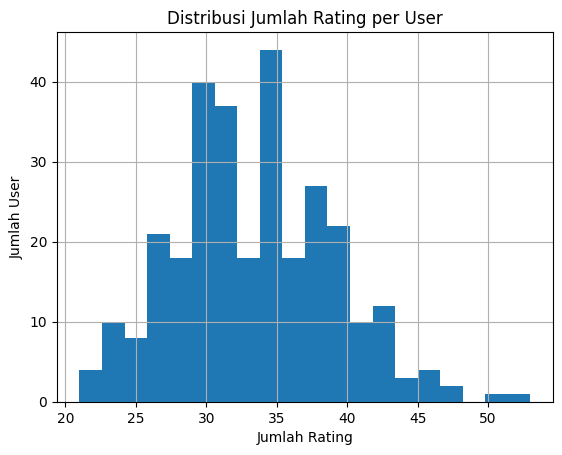

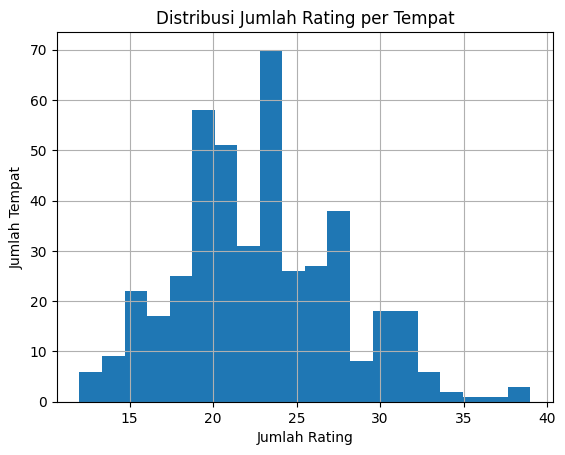

In [ ]:
# Distribusi jumlah rating per user
df_rating['User_Id'].value_counts().hist(bins=20)
plt.title("Distribusi Jumlah Rating per User")
plt.xlabel("Jumlah Rating")
plt.ylabel("Jumlah User")
plt.show()

# Distribusi jumlah rating per tempat
df_rating['Place_Id'].value_counts().hist(bins=20)
plt.title("Distribusi Jumlah Rating per Tempat")
plt.xlabel("Jumlah Rating")
plt.ylabel("Jumlah Tempat")
plt.show()


## 11. Distribusi Data Berdasarkan Lokasi, Kategori, dan Kota
Bagian ini menampilkan informasi terkait lokasi pengguna, kategori tempat wisata, dan distribusi kota pada paket wisata.

In [ ]:
# Lihat 10 lokasi teratas dari user
print("10 Lokasi dengan jumlah user terbanyak:\n", df_user['Location'].value_counts().head(10))

# Lihat 10 kategori tempat wisata terbanyak
print("\n10 Kategori Tempat Wisata Terbanyak:\n", df_tourism['Category'].value_counts().head(10))

# Lihat kota yang paling sering muncul dalam paket
print("\nDistribusi kota dalam Package Tourism:\n", df_package['City'].value_counts())


10 Lokasi dengan jumlah user terbanyak:
 Location
Bekasi, Jawa Barat              39
Semarang, Jawa Tengah           22
Lampung, Sumatera Selatan       20
Yogyakarta, DIY                 20
Bogor, Jawa Barat               17
Cirebon, Jawa Barat             14
Jakarta Selatan, DKI Jakarta    14
Subang, Jawa Barat              14
Depok, Jawa Barat               12
Ponorogo, Jawa Timur            11
Name: count, dtype: int64

10 Kategori Tempat Wisata Terbanyak:
 Category
Taman Hiburan         135
Budaya                117
Cagar Alam            106
Bahari                 47
Tempat Ibadah          17
Pusat Perbelanjaan     15
Name: count, dtype: int64

Distribusi kota dalam Package Tourism:
 City
Jakarta       20
Yogyakarta    20
Bandung       20
Semarang      20
Surabaya      20
Name: count, dtype: int64


### Penjelasan:
1. Lokasi Pengguna (df_user['Location']):
- Menampilkan 10 lokasi teratas berdasarkan jumlah pengguna yang terdaftar di lokasi tersebut.
- Membantu untuk melihat di mana pengguna lebih banyak beraktivitas atau berasal.

2. Kategori Tempat Wisata (df_tourism['Category']):
- Menampilkan 10 kategori tempat wisata terbanyak.
- Membantu untuk melihat kategori tempat wisata yang paling sering dipilih oleh pengguna.

3. Kota dalam Paket Wisata (df_package['City']):
- Menampilkan distribusi kota dalam dataset paket wisata.
- Memberikan informasi tentang kota-kota yang paling banyak muncul dalam paket wisata yang ditawarkan.

### Interpretasi:
- Lokasi Pengguna: Melihat lokasi dengan jumlah pengguna terbanyak memberikan gambaran tentang konsentrasi pengguna. Ini bisa membantu dalam merancang rekomendasi yang lebih relevan berdasarkan lokasi geografis pengguna.
- Kategori Tempat Wisata: Mengetahui kategori tempat wisata terbanyak memberi wawasan tentang preferensi umum pengguna terhadap jenis tempat wisata. Ini bisa digunakan untuk menyesuaikan rekomendasi tempat wisata berdasarkan tren popularitas.
- Kota dalam Paket Wisata: Menunjukkan distribusi kota dalam paket wisata, memberikan gambaran tentang kota-kota yang lebih sering muncul dalam paket wisata yang ditawarkan, dan ini bisa menjadi informasi penting untuk merancang penawaran wisata lebih baik.

### Manfaat:
- Memberikan informasi tentang distribusi pengguna, tempat wisata, dan kota pada dataset yang membantu dalam perencanaan model rekomendasi berbasis lokasi dan kategori.
- Memberikan wawasan terkait ketidakseimbangan data, seperti lokasi atau kota yang lebih dominan, yang bisa mempengaruhi cara sistem rekomendasi bekerja.

# Data Preprocessing
Data preprocessing adalah tahap awal dalam proses analisis data atau pembuatan model machine learning yang bertujuan untuk membersihkan dan mempersiapkan data mentah agar layak untuk dianalisis. Data yang diperoleh dari berbagai sumber sering kali mengandung noise, nilai kosong (missing values), duplikasi, atau outlier yang dapat memengaruhi kualitas hasil analisis atau performa model.

Preprocessing merupakan langkah krusial karena kualitas data sangat menentukan kualitas output dari model atau analisis yang dilakukan. Dengan data yang bersih dan terstruktur, kita bisa mendapatkan insight yang lebih akurat dan model yang lebih andal.



### 1. Penanganan Missing Values
Untuk memastikan kualitas data, dilakukan pemeriksaan dan penghapusan nilai kosong (missing values) pada setiap dataset (df_user, df_rating, df_tourism, dan df_package). Proses ini dilakukan menggunakan fungsi dropna(), diikuti dengan pengecekan ulang untuk memastikan tidak ada nilai yang hilang tersisa.

In [ ]:
# Drop missing values
df_user.dropna(inplace=True)
df_rating.dropna(inplace=True)
df_tourism.dropna(inplace=True)
df_package.dropna(inplace=True)

# Cek jumlah missing values setelah di-drop
print("Setelah dihapus (missing values):")
print("df_user:\n", df_user.isnull().sum(), "\n")
print("df_rating:\n", df_rating.isnull().sum(), "\n")
print("df_tourism:\n", df_tourism.isnull().sum(), "\n")
print("df_package:\n", df_package.isnull().sum(), "\n")

Setelah dihapus (missing values):
df_user:
 User_Id     0
Location    0
Age         0
dtype: int64 

df_rating:
 User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64 

df_tourism:
 Place_Id        0
Place_Name      0
Description     0
Category        0
City            0
Price           0
Rating          0
Time_Minutes    0
Lat             0
Long            0
dtype: int64 

df_package:
 Package           0
City              0
Place_Tourism1    0
Place_Tourism2    0
Place_Tourism3    0
Place_Tourism4    0
Place_Tourism5    0
dtype: int64 



### 2. penghapusan data duplikat
Pada tahap awal preprocessing, dilakukan penghapusan data yang bersifat duplikat pada seluruh dataframe yang digunakan, yaitu: df_user, df_rating, `dfdf_tourism, dan df_package. Kebera

Langkah ini memastikan bahwa setiap entri dalam dataset bersifat unik dan valid sebelum dilakukan proses lebih lanjut seperti penanganan nilai yang hilang atau pengkodean data. Setelah penghapusan, dilakukan pengecekan ulang untuk mem

In [ ]:
# Hapus data duplikat
df_user.drop_duplicates(inplace=True)
df_rating.drop_duplicates(inplace=True)
df_tourism.drop_duplicates(inplace=True)
df_package.drop_duplicates(inplace=True)

# Cek kembali jumlah duplikat setelah penghapusan
print("Setelah dihapus (duplikat):")
print("df_user:", df_user.duplicated().sum())
print("df_rating:", df_rating.duplicated().sum())
print("df_tourism:", df_tourism.duplicated().sum())
print("df_package:", df_package.duplicated().sum())

Setelah dihapus (duplikat):
df_user: 0
df_rating: 0
df_tourism: 0
df_package: 0


### 3. Deteksi Outlier Menggunakan Boxpl
Untuk mengidentifikasi adanya outlier dalam data numerik, dilakukan visualisasi boxplot pada masing-masing dataframe: df_package, `df_ratindf_rating, `df_pariwisata_df_tourism, dan df_user.

Langkah ini penting dilakukan sebelum melakukan normalisasi atau proses machine learning lainnya, karena outlier dapat mempengaruhi performa model secara signifikan. Dengan visualisasi ini, pengguna dapat dengan mudah mengamati distribusi data dan menentukan perlakuan selanjutnya terhadap outlier

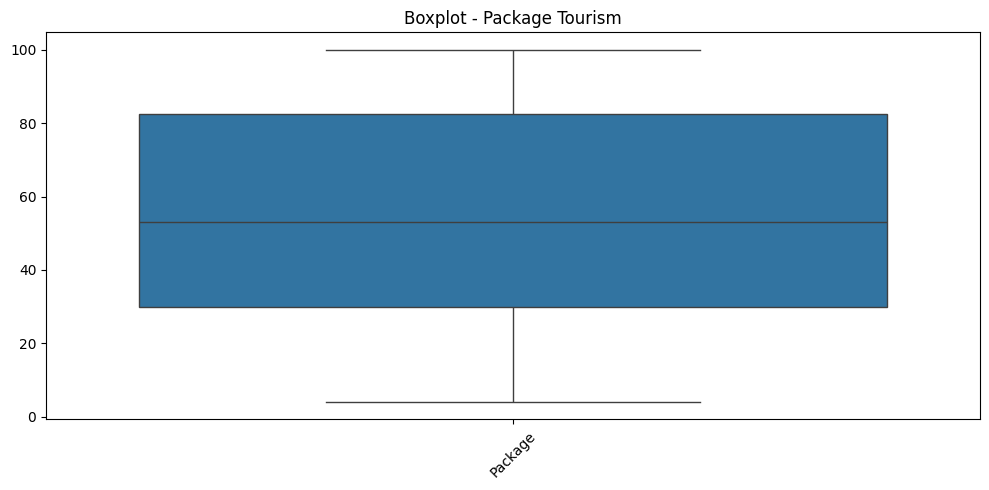

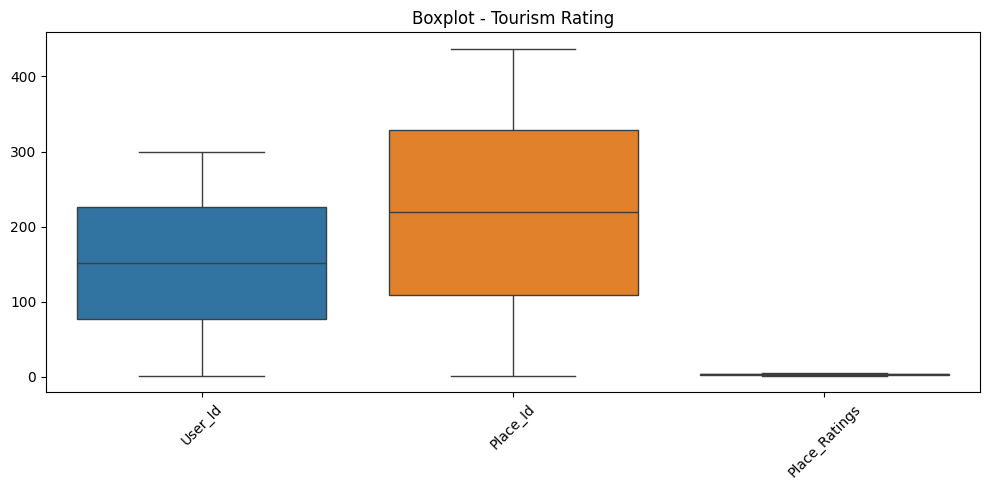

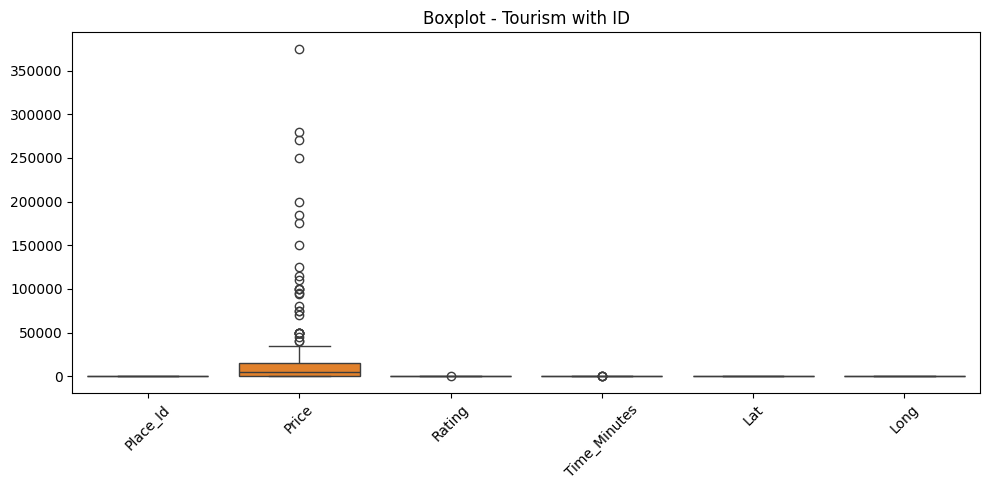

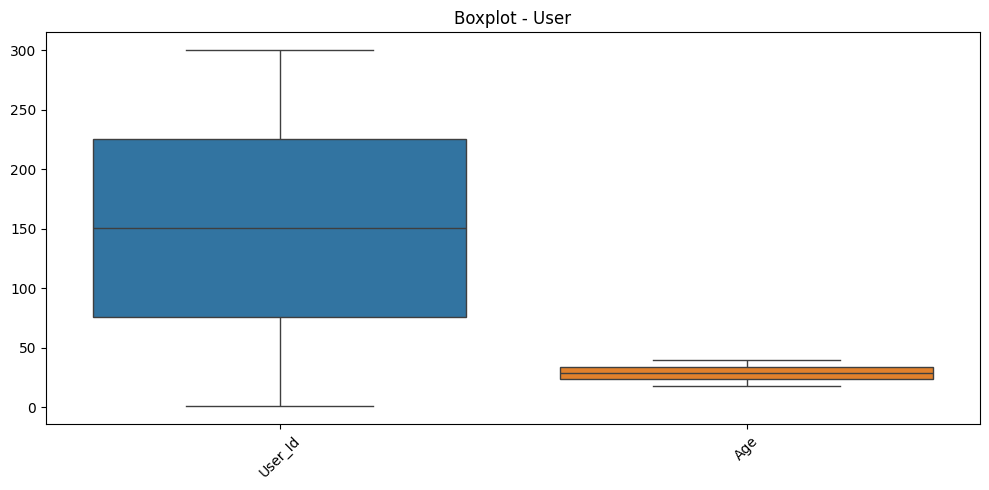

In [ ]:
# Ambil fitur numerik
numeric_dfs = [
    df_package.select_dtypes(include='number'),
    df_rating.select_dtypes(include='number'),
    df_tourism.select_dtypes(include='number'),
    df_user.select_dtypes(include='number')
]

titles = ['Package Tourism', 'Tourism Rating', 'Tourism with ID', 'User']

# Plot boxplot
for df, title in zip(numeric_dfs, titles):
    if df.shape[1] > 0:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df)
        plt.title(f'Boxplot - {title}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


### 4. Menghapus Outlier Menggunakan Metode IQR
Pada bagian ini, dilakukan pembersihan data dari nilai-nilai ekstrem (outlier) menggunakan metode Interquartile Range (IQR). Outlier dapat mempengaruhi hasil analisis dan performa model. Oleh karena itu, penting untuk menghapusnya.

Fungsi remove_outliers_iqr digunakan untuk memfilter data berdasarkan nilai Q1 (kuartil bawah) dan Q3 (kuartil atas), dengan batas toleransi sebesar 1.5 * IQR. Fungsi ini diterapkan ke seluruh kolom numerik dari beberapa dataset, seperti df_user, df_rating, df_tourism, dan df_package. Sebelum dan sesudah proses, ukuran dataset dibandingkan untuk mengetahui seberapa banyak data yang terdeteksi sebagai outlier dan dihapus.

In [ ]:
# Fungsi untuk hapus outlier berdasarkan IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        # Add a check to see if the column exists
        if col not in df.columns:
            print(f"Error: Column '{col}' not found in DataFrame. Available columns: {df.columns.tolist()}")
            continue # Skip to the next column if not found
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Simpan jumlah sebelum
print("Jumlah data sebelum outlier removal:")
print("df_user:", df_user.shape)
print("df_rating:", df_rating.shape)
print("df_tourism:", df_tourism.shape)
print("df_package:", df_package.shape, "\n")

# Add this line to check columns before the call that fails
print("Columns in df_rating before outlier removal:", df_rating.columns.tolist())

# Terapkan ke dataset (tentukan kolom numerik)
df_user = remove_outliers_iqr(df_user, df_user.select_dtypes(include='number').columns)
df_rating = remove_outliers_iqr(df_rating, ['Place_Ratings'])  # rating saja
df_tourism = remove_outliers_iqr(df_tourism, df_tourism.select_dtypes(include='number').columns)
df_package = remove_outliers_iqr(df_package, df_package.select_dtypes(include='number').columns)

# Simpan jumlah setelah
print("Jumlah data setelah outlier removal:")
print("df_user:", df_user.shape)
print("df_rating:", df_rating.shape)
print("df_tourism:", df_tourism.shape)
print("df_package:", df_package.shape)


Jumlah data sebelum outlier removal:
df_user: (300, 3)
df_rating: (9921, 3)
df_tourism: (205, 10)
df_package: (39, 7) 

Columns in df_rating before outlier removal: ['User_Id', 'Place_Id', 'Place_Ratings']
Jumlah data setelah outlier removal:
df_user: (300, 3)
df_rating: (9921, 3)
df_tourism: (168, 10)
df_package: (39, 7)


### 5. Visualisasi Boxplot setelah Penghapusan Outlier
Pada tahap ini, dilakukan visualisasi menggunakan boxplot untuk masing-masing dataset (User, Rating, Tourism, dan Package). Boxplot digunakan untuk:
- Melihat distribusi data numerik
- Mengidentifikasi outlier secara visual
- Memahami sebaran dan variasi data

Setiap grafik menampilkan kolom-kolom numerik dari masing-masing DataFrame. Proses ini membantu dalam validasi apakah metode penghapusan outlier sebelumnya telah bekerja secara efektif.

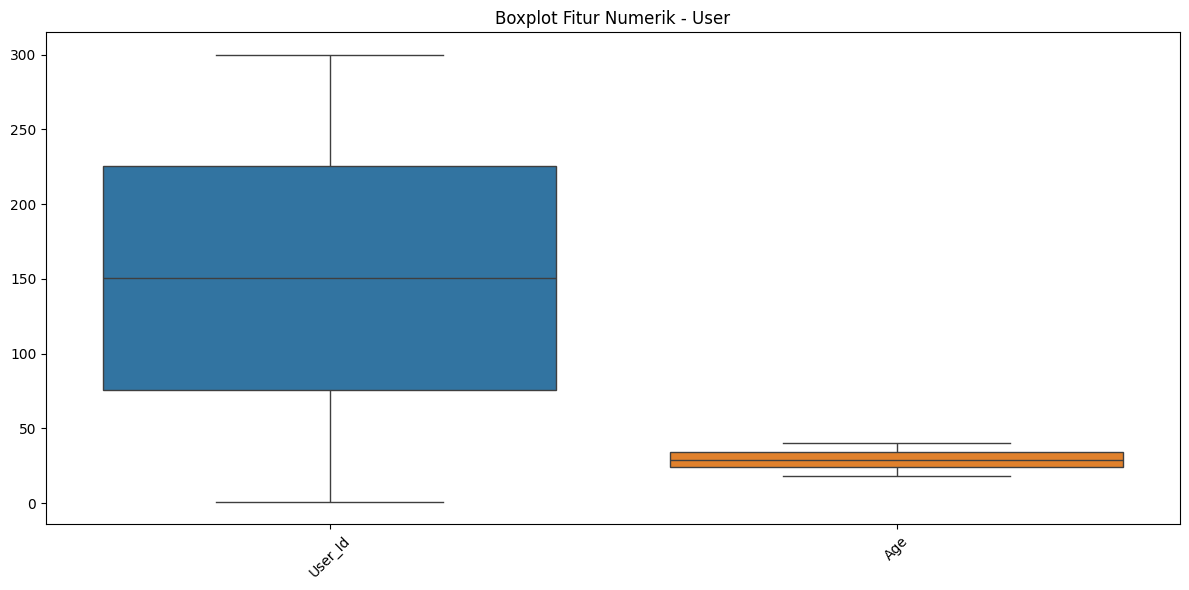

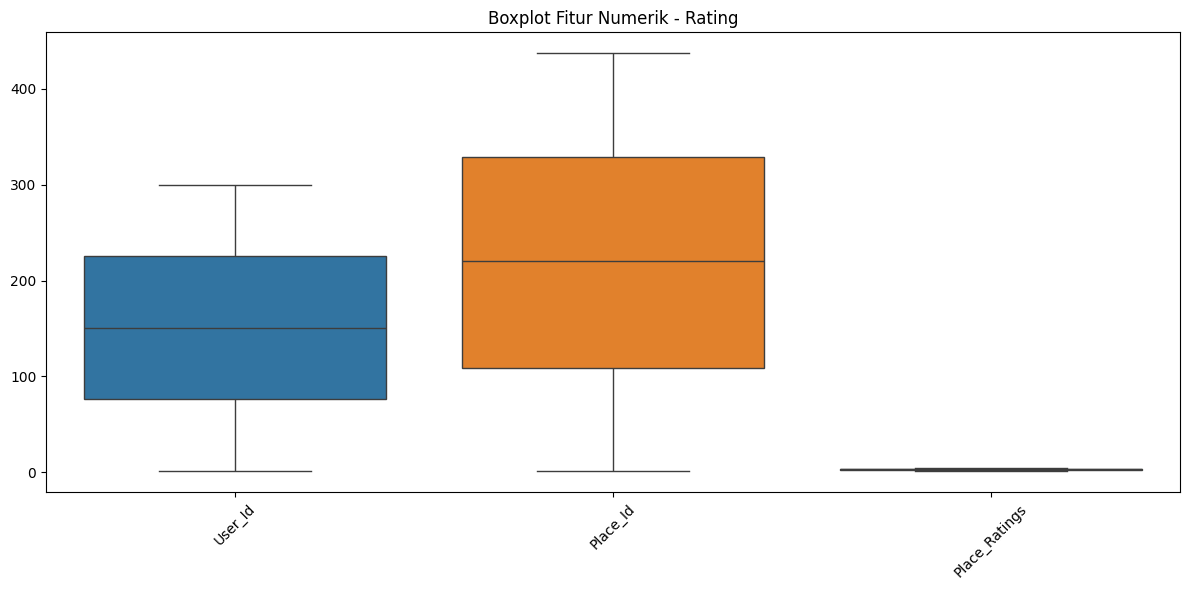

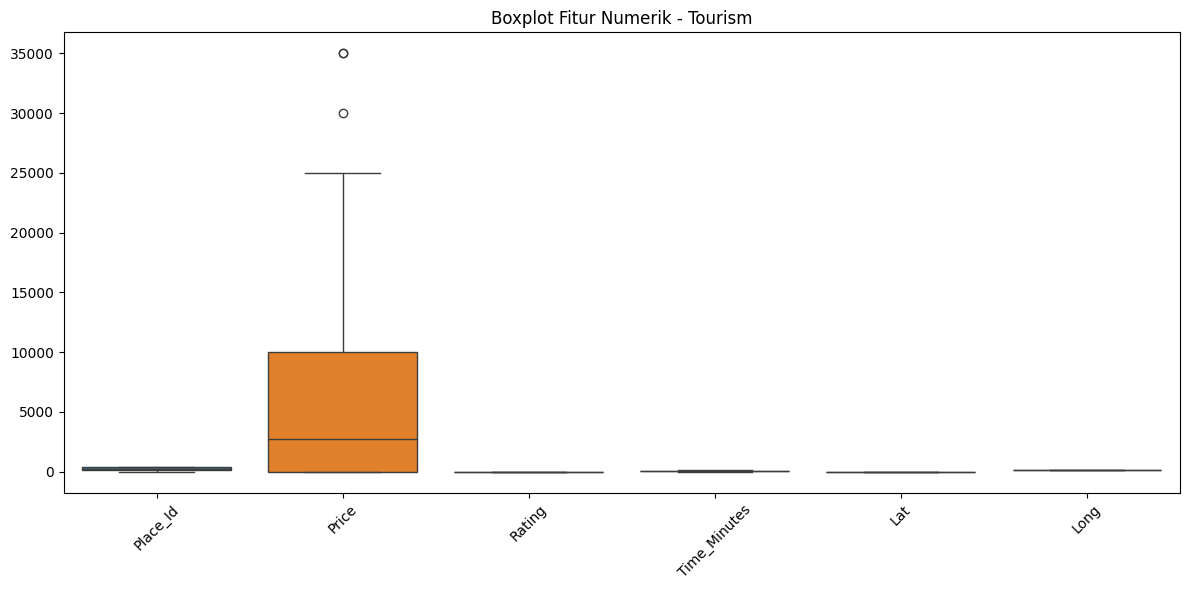

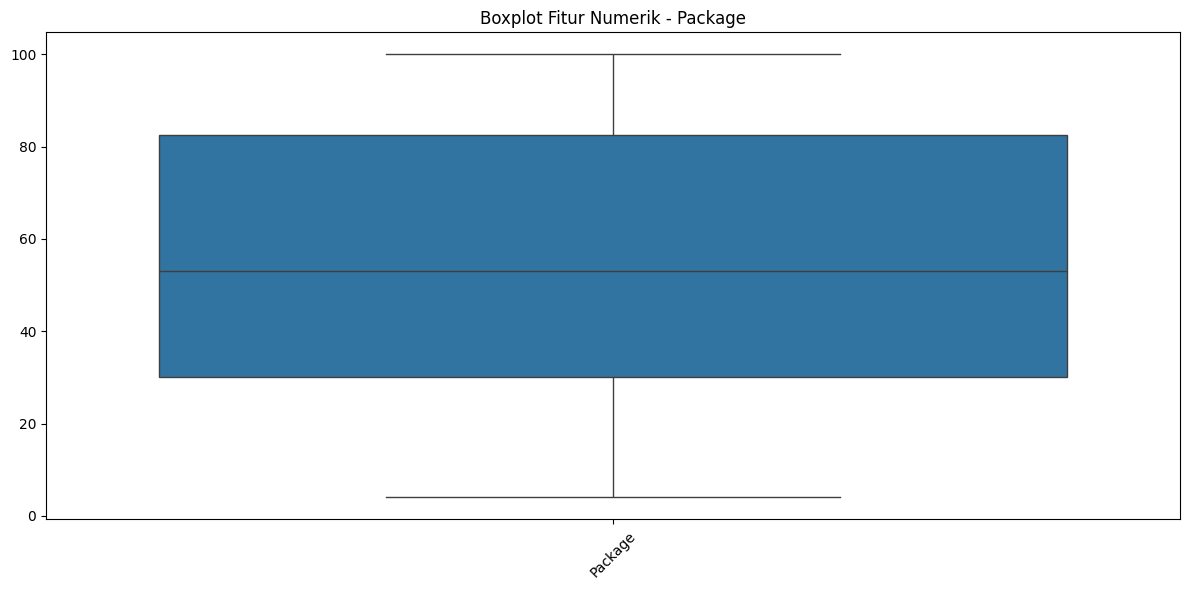

In [ ]:
# Visualisasi boxplot setiap DataFrame
datasets = [(df_user, 'User'), (df_rating, 'Rating'), (df_tourism, 'Tourism'), (df_package, 'Package')]

for df, name in datasets:
    numeric_cols = df.select_dtypes(include='number').columns
    if len(numeric_cols) > 0:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df[numeric_cols])
        plt.title(f'Boxplot Fitur Numerik - {name}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


# Modeling

## Content Based Filtering (CBF)

### 1. Visualisasi Distribusi Kategori Tempat Wisata

<ipython-input-25-93f8e980b7ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tourism, x='Category', palette='Set2', order=df_tourism['Category'].value_counts().index)


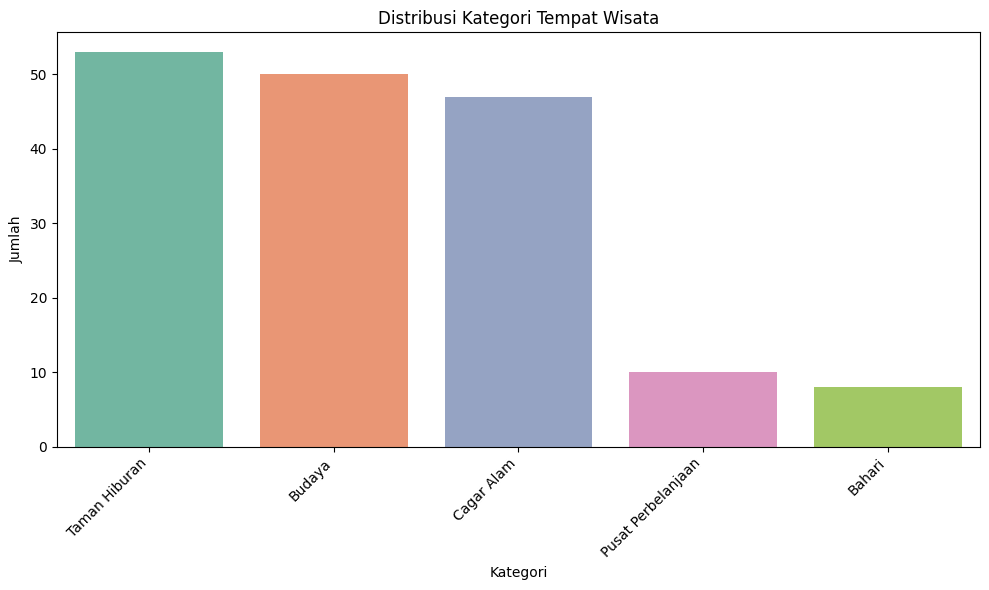

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_tourism, x='Category', palette='Set2', order=df_tourism['Category'].value_counts().index)
plt.title('Distribusi Kategori Tempat Wisata')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

#### Penjelasan:

Visualisasi ini digunakan untuk menampilkan jumlah tempat wisata berdasarkan kategori. Berikut rincian prosesnya:
- plt.figure(figsize=(10, 6)): Mengatur ukuran plot agar lebih lebar dan mudah dibaca.
- sns.countplot(...): Membuat barplot yang menghitung jumlah entri (tempat wisata) pada masing-masing kategori.
  - x='Category': Menggunakan kolom Category sebagai sumbu-x.
  - palette='Set2': Menggunakan palet warna yang lembut dan mudah dibedakan.
  - order=...: Mengurutkan kategori berdasarkan frekuensi kemunculannya.
- plt.title(...), plt.xlabel(...), plt.ylabel(...): Menambahkan judul dan label sumbu untuk memperjelas isi grafik.
- plt.xticks(rotation=45, ha="right"): Memutar label sumbu-x agar tidak saling bertumpukan dan lebih terbaca.
- plt.tight_layout(): Mengatur tata letak agar tidak ada elemen yang tertimpa.
- plt.show(): Menampilkan plot.

Visualisasi ini berguna untuk memahami seberapa beragam kategori wisata yang ada dan seberapa banyak tempat wisata dalam masing-masing kategori tersebut.

### 2. Analisis Linguistik: Distribusi Part-of-Speech (POS) pada Nama Tempat Wisata

<ipython-input-26-e255e43c5aed>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_counts.index, y=pos_counts.values, palette='Set1')


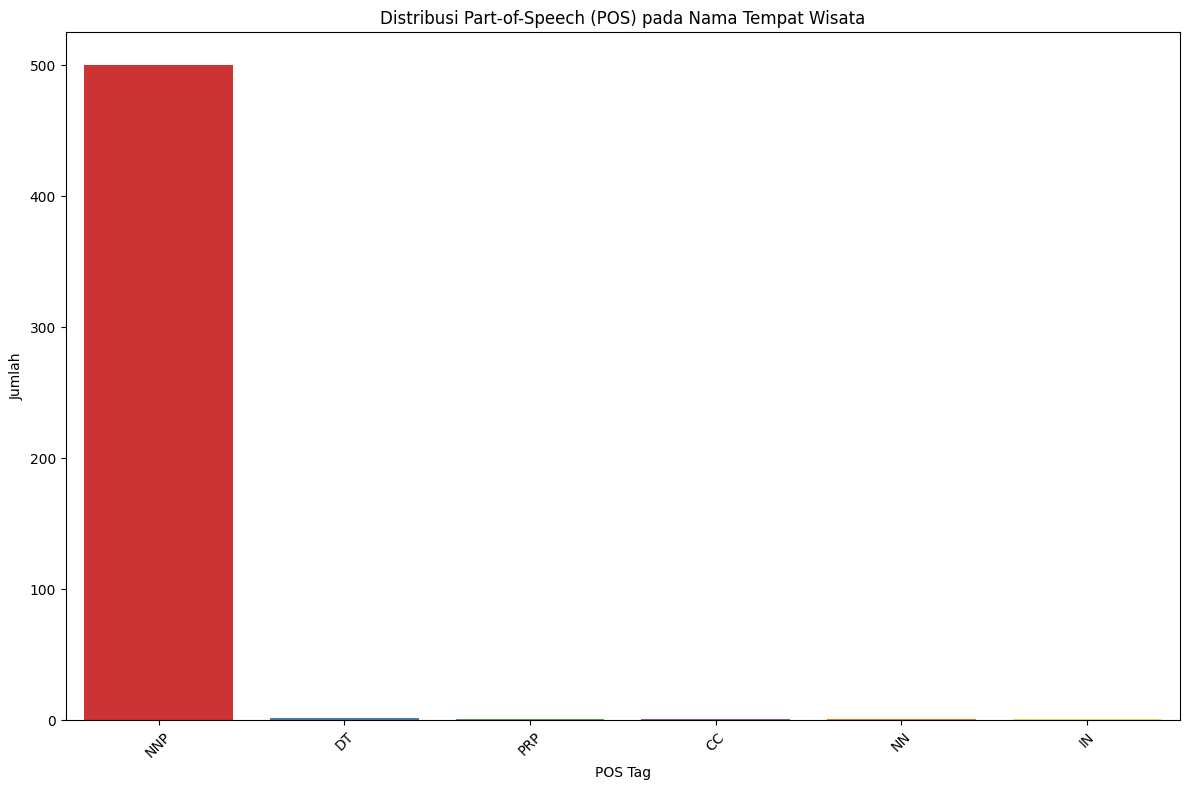

In [ ]:
blob = TextBlob(" ".join(df_tourism['Place_Name'].dropna()))
pos_df = pd.DataFrame(blob.tags, columns=['word', 'pos'])
pos_counts = pos_df['pos'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=pos_counts.index, y=pos_counts.values, palette='Set1')
plt.title('Distribusi Part-of-Speech (POS) pada Nama Tempat Wisata')
plt.xlabel('POS Tag')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Penjelasan:

Pada bagian ini, dilakukan analisis linguistik untuk mengetahui jenis-jenis kata (Part-of-Speech / POS) yang sering muncul dalam nama tempat wisata.
- TextBlob(" ".join(...)): Menggabungkan semua nama tempat wisata menjadi satu string dan membuat objek TextBlob untuk analisis linguistik.
- .tags: Menghasilkan daftar pasangan (kata, jenis_kata) atau (word, POS tag) berdasarkan analisis grammar Bahasa Inggris.
- pd.DataFrame(..., columns=['word', 'pos']): Mengubah hasil POS tagging menjadi DataFrame agar lebih mudah dianalisis.
- pos_df['pos'].value_counts(): Menghitung jumlah kemunculan tiap jenis kata.

#### Visualisasi:
- sns.barplot(...): Membuat bar chart untuk menampilkan distribusi POS tag.
- Sumbu-x berisi jenis POS (seperti NN = noun, JJ = adjective, dll).
- Sumbu-y menunjukkan jumlah kata yang termasuk dalam masing-masing POS.
- plt.xticks(rotation=45): Memutar label POS tag agar lebih terbaca.

Tujuan dari visualisasi ini adalah untuk memahami struktur linguistik dari nama tempat wisata. Hal ini bisa membantu ketika akan melakukan ekstraksi fitur berbasis teks.

### 3. Analisis Bigram pada Nama Tempat Wisata

<ipython-input-27-24f811551415>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bigram', y='Count', data=bigram_df, palette='viridis')


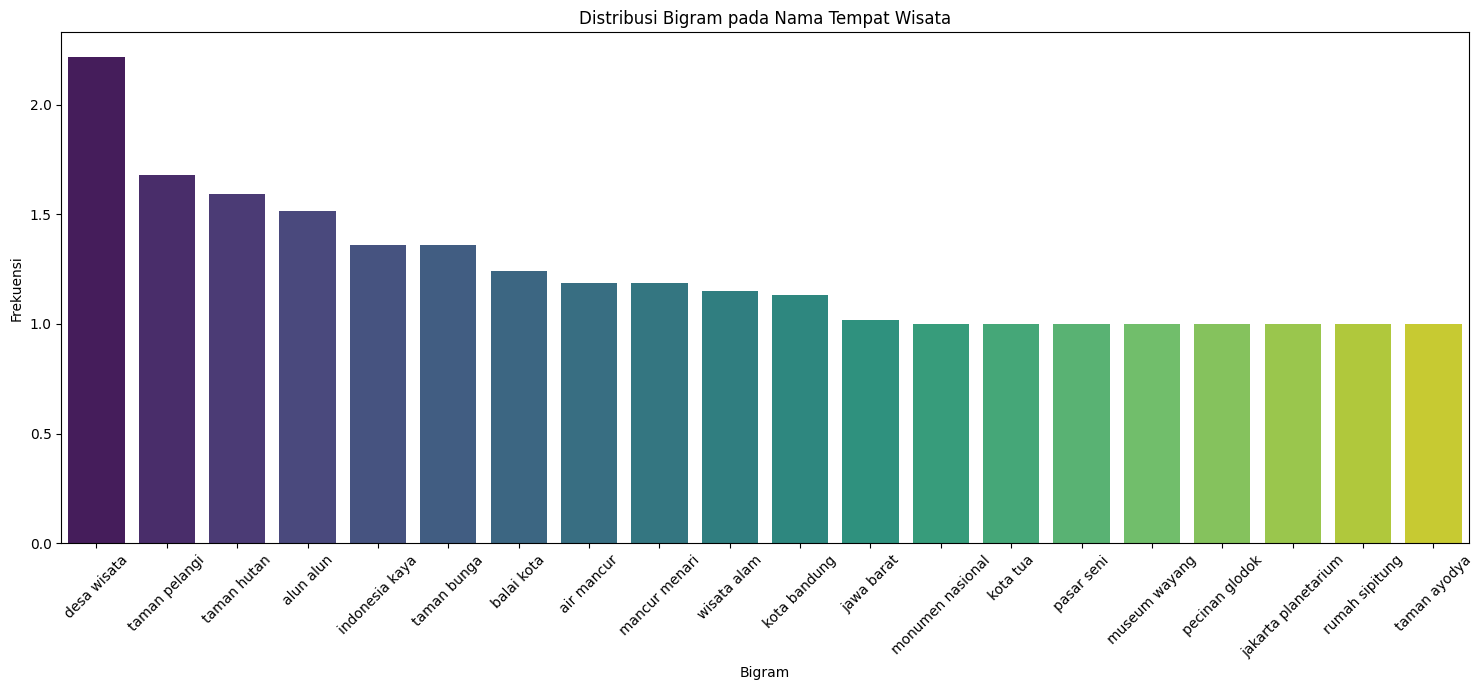

In [ ]:
tfidf_bigram = TfidfVectorizer(ngram_range=(2, 2), stop_words='english')
tfidf_bigram_matrix = tfidf_bigram.fit_transform(df_tourism['Place_Name'].fillna(''))
total_bigram = tfidf_bigram_matrix.sum(axis=0)
bigram_freq = [(word, total_bigram[0, idx]) for word, idx in tfidf_bigram.vocabulary_.items()]
bigram_df = pd.DataFrame(sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:20], columns=['Bigram', 'Count'])

plt.figure(figsize=(15, 7))
sns.barplot(x='Bigram', y='Count', data=bigram_df, palette='viridis')
plt.title('Distribusi Bigram pada Nama Tempat Wisata')
plt.xlabel('Bigram')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Penjelasan:

Analisis ini bertujuan untuk melihat kombinasi dua kata yang paling sering muncul (bigram) dalam nama tempat wisata.

Langkah-langkah:
- TfidfVectorizer(ngram_range=(2, 2)): Menghitung TF-IDF untuk kombinasi dua kata berurutan (bigram) saja.
- fillna(''): Menghindari error akibat missing value dengan mengganti NaN menjadi string kosong.
- total_bigram = tfidf_bigram_matrix.sum(axis=0): Menjumlahkan nilai TF-IDF untuk setiap bigram.
- bigram_freq: Membuat list dari pasangan (bigram, jumlah) berdasarkan bobot TF-IDF.
- sorted(...)[ :20 ]: Mengambil 20 bigram teratas berdasarkan nilai TF-IDF tertinggi.

#### Visualisasi:
- Bar chart menampilkan frekuensi relatif (berdasarkan bobot TF-IDF) dari bigram paling umum yang muncul dalam nama tempat wisata.

- Hal ini membantu mengidentifikasi pola kata umum seperti "Taman Wisata", "Pantai Indah", dan sebagainya, yang relevan untuk fitur teks.

### 4. Analisis Trigram pada Nama Tempat Wisata

<ipython-input-28-60fb0bebcfbd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trigram', y='Count', data=trigram_df, palette='coolwarm')


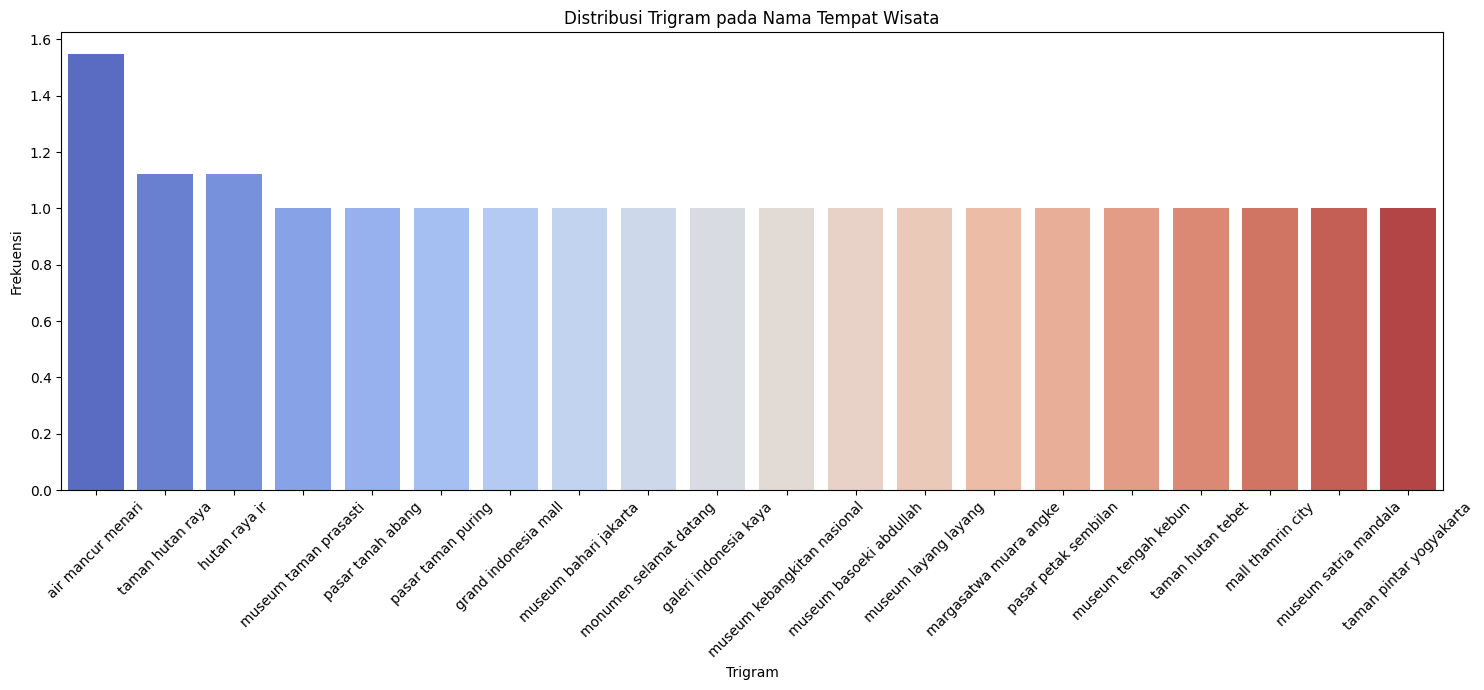

In [ ]:
tfidf_trigram = TfidfVectorizer(ngram_range=(3, 3), stop_words='english')
tfidf_trigram_matrix = tfidf_trigram.fit_transform(df_tourism['Place_Name'].fillna(''))
total_trigram = tfidf_trigram_matrix.sum(axis=0)
trigram_freq = [(word, total_trigram[0, idx]) for word, idx in tfidf_trigram.vocabulary_.items()]
trigram_df = pd.DataFrame(sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:20], columns=['Trigram', 'Count'])

plt.figure(figsize=(15, 7))
sns.barplot(x='Trigram', y='Count', data=trigram_df, palette='coolwarm')
plt.title('Distribusi Trigram pada Nama Tempat Wisata')
plt.xlabel('Trigram')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Penjelasan:

Analisis ini memperluas eksplorasi sebelumnya dari bigram menjadi trigram, yaitu kombinasi tiga kata berurutan dalam nama tempat wisata.

Langkah-langkah:
- TfidfVectorizer(ngram_range=(3, 3)): Menghitung TF-IDF hanya untuk trigram.
- fit_transform: Membentuk matriks fitur trigram berdasarkan kolom Place_Name.
- total_trigram: Menjumlahkan skor TF-IDF untuk setiap trigram di seluruh dataset.
- trigram_df: Menyusun 20 trigram paling signifikan menurut nilai TF-IDF.

#### Visualisasi:
- Bar chart menampilkan trigram dengan nilai TF-IDF tertinggi, yang menunjukkan frasa tiga kata paling informatif dalam penamaan tempat wisata.
- Pola trigram seperti "Taman Wisata Alam", "Pantai Indah Selatan", atau "Museum Sejarah Nasional" bisa muncul sebagai fitur penting dalam model rekomendasi berbasis konten (CBF).

### 5. Penggabungan Fitur untuk Content-Based Filtering

In [ ]:
# Gabungkan fitur: nama tempat, kategori, harga, dan rating
df_tourism['combined_features'] = (
    df_tourism['Place_Name'] + ' ' +
    df_tourism['Category'].str.replace('|', ' ', regex=False) + ' ' +
    df_tourism['Price'].astype(str) + ' ' +
    df_tourism['Rating'].astype(str)
)

Penjelasan:

Langkah ini bertujuan untuk menggabungkan beberapa fitur penting menjadi satu representasi teks yang dapat diproses oleh algoritma TF-IDF dalam model rekomendasi berbasis konten.
- Place_Name: Nama tempat wisata sebagai identitas utama.
- Category: Kategori tempat wisata (misal: Cagar Budaya, Taman Hiburan), simbol | dihapus agar bisa dibaca sebagai kata terpisah.
- Price dan Rating: Diubah menjadi string agar bisa digabung dengan teks lainnya, sehingga karakteristik numerik juga ikut dipertimbangkan sebagai fitur tekstual.

Hasil dari penggabungan ini disimpan dalam kolom baru bernama combined_features, yang nantinya akan digunakan untuk TF-IDF vectorization dan perhitungan kemiripan antar tempat wisata.

### 6. TF-IDF Vectorization pada Fitur Gabungan

In [ ]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_tourism['combined_features'])

Langkah ini melakukan konversi fitur gabungan (combined_features) menjadi representasi numerik menggunakan teknik TF-IDF (Term Frequency–Inverse Document Frequency).
- TfidfVectorizer: Mengubah kumpulan teks menjadi matriks fitur berbobot berdasarkan pentingnya kata dalam dokumen (tempat wisata) dan keseluruhan korpus.
- stop_words='english': Menghapus kata-kata umum dalam bahasa Inggris yang dianggap tidak memberikan makna signifikan (seperti "the", "is", "on", dsb).

Hasilnya adalah tfidf_matrix, yaitu sebuah matriks sparse di mana setiap baris merepresentasikan satu tempat wisata, dan setiap kolom mewakili skor TF-IDF dari kata-kata unik yang ditemukan dalam fitur gabungan.

Matriks inilah yang akan digunakan untuk menghitung kemiripan antar tempat wisata.

### 7. Menghitung Cosine Similarity antar Tempat Wisata

In [ ]:
# Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

#### Penjelasan:

Pada tahap ini dilakukan perhitungan Cosine Similarity antara semua tempat wisata berdasarkan representasi TF-IDF yang telah dibentuk sebelumnya.
- cosine_similarity(tfidf_matrix, tfidf_matrix): Mengukur kesamaan antar vektor TF-IDF dari setiap tempat wisata.
- Nilai cosine similarity berkisar antara 0 hingga 1:
  - 1 berarti kedua tempat sangat mirip (vektor sejajar).
  - 0 berarti tidak ada kemiripan sama sekali (vektor tegak lurus).

Hasilnya adalah sebuah matriks persegi (N x N), di mana cosine_sim[i][j] menunjukkan tingkat kemiripan antara tempat wisata ke-i dan ke-j.

Matriks ini menjadi dasar utama untuk melakukan rekomendasi berbasis kemiripan konten (Content-Based Filtering).

### 8. Membentuk DataFrame dari Cosine Similarity

In [ ]:
# DataFrame similarity
similarity_df = pd.DataFrame(
    cosine_sim,
    index=df_tourism['Place_Name'],
    columns=df_tourism['Place_Name']
)

### Penjelasan:

Setelah menghitung cosine similarity, hasil matriksnya dikonversi menjadi sebuah DataFrame yang lebih mudah dibaca dan digunakan.
- Baris dan kolom diberi label menggunakan nama tempat wisata (Place_Name).
- Setiap sel similarity_df[i][j] menunjukkan tingkat kemiripan antara tempat wisata ke-i dengan tempat wisata ke-j.

DataFrame ini sangat berguna sebagai lookup table untuk mengambil skor kemiripan antar tempat ketika ingin menampilkan rekomendasi.

### 9. Mapping Nama Tempat ke Index

In [ ]:
# Mapping nama ke index
indices = pd.Series(df_tourism.index, index=df_tourism['Place_Name']).drop_duplicates()

#### Penjelasan:

Baris kode ini membuat sebuah struktur data (Series) yang digunakan untuk memetakan nama tempat wisata ke index barisnya dalam df_tourism.
- Berguna saat pengguna memberikan nama tempat sebagai input, sehingga kita bisa cepat menemukan baris/posisinya dalam dataset.
- drop_duplicates() digunakan untuk menghindari konflik jika ada nama tempat yang duplikat.

Struktur ini penting untuk proses pengambilan rekomendasi berbasis kemiripan karena cosine similarity disusun berdasarkan urutan index.

### 10. Fungsi Rekomendasi Tempat Wisata Berdasarkan Kemiripan (Content-Based Filtering)

In [ ]:
def get_recommendations(place_name, cosine_sim=cosine_sim, sort_by=None):
    if place_name not in indices:
        return f"❌ Nama tempat '{place_name}' tidak ditemukan dalam data."

    idx = indices[place_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 selain dirinya sendiri
    place_indices = [i[0] for i in sim_scores]

    results = df_tourism.iloc[place_indices][['Place_Id', 'Place_Name', 'Category', 'Price', 'Rating', 'Description']]

    # Ini harus berada DI DALAM fungsi
    if sort_by == 'price':
        results = results.sort_values(by='Price', ascending=True)
    elif sort_by == 'rating':
        results = results.sort_values(by='Rating', ascending=False)

    return results


#### Penjelasan:

Fungsi get_recommendations bertujuan untuk menghasilkan rekomendasi tempat wisata yang mirip dengan tempat yang diberikan oleh pengguna.

Proses:
1. Validasi input: Jika nama tempat tidak ada dalam data, fungsi akan mengembalikan pesan error.
2. Cari indeks tempat: Ambil index tempat berdasarkan indices.
3. Hitung kemiripan: Ambil nilai cosine similarity terhadap semua tempat, urutkan dari yang paling mirip.
4. Ambil Top-10: Pilih 10 tempat paling mirip (kecuali dirinya sendiri).
5. Filter kolom penting: Tampilkan hanya kolom yang relevan untuk ditampilkan ke pengguna.
6. Opsi pengurutan:
  - Jika sort_by='price': Rekomendasi diurutkan berdasarkan harga termurah.
  - Jika sort_by='rating': Rekomendasi diurutkan berdasarkan rating tertinggi.

Fungsi ini fleksibel dan bisa digunakan dengan berbagai input serta kebutuhan pengguna.

### 11. Contoh Pemanggilan Fungsi Rekomendasi Berdasarkan Harga

In [ ]:
# Contoh pemanggilan
get_recommendations("Museum Taman Prasasti", sort_by='price')  # Atau sort_by='rating'

,Place_Id,Place_Name,Category,Price,Rating,Description
73,74,Museum Tengah Kebun,Budaya,0,4.6,Museum di Tengah Kebun adalah sebuah museum pe...
19,20,Museum Taman Prasasti,Budaya,2000,4.5,Museum Taman Prasasti adalah sebuah museum cag...
40,41,Museum Bahari Jakarta,Budaya,2000,4.4,Museum Bahari adalah museum yang menyimpan kol...
59,60,Museum Tekstil,Budaya,5000,4.5,Museum cinta Tekstil menempati gedung tua di J...
20,21,Museum Wayang,Budaya,5000,4.5,Museum Wayang adalah sebuah museum yang berlok...
81,82,Museum Satria Mandala,Budaya,5000,4.5,Museum Satria Mandala adalah museum sejarah pe...
414,415,Museum De Javasche Bank,Budaya,5000,4.6,Museum Bank Indonesia (Bahasa Indonesia: Museu...
117,118,Museum Sonobudoyo Unit I,Budaya,5000,4.6,Museum Sonobudoyo adalah museum dan perpustaka...
372,373,Museum Kereta Ambarawa,Budaya,10000,4.5,Museum Kereta Api Ambarawa (bahasa Inggris: In...
175,176,Museum Gunung Merapi,Budaya,10000,4.4,Museum Gunung Merapi (bahasa Jawa: ꧋ꦩꦸꦱꦶꦪꦸꦩ꧀​ ...


#### Penjelasan:

Pada bagian ini, fungsi get_recommendations dipanggil dengan input:
- place_name: "Museum Taman Prasasti"
- sort_by: 'price' → hasil rekomendasi akan diurutkan berdasarkan harga termurah.

Output dari pemanggilan ini adalah 10 tempat wisata yang paling mirip dengan "Museum Taman Prasasti", ditentukan dari kemiripan fitur-fitur seperti nama, kategori, harga, dan rating, lalu diurutkan berdasarkan harga.

### 12. Contoh Pemanggilan Fungsi Rekomendasi Berdasarkan Rating

In [ ]:
# Contoh pemanggilan
get_recommendations("Museum Taman Prasasti", sort_by='rating')  # Atau sort_by='price'

,Place_Id,Place_Name,Category,Price,Rating,Description
414,415,Museum De Javasche Bank,Budaya,5000,4.6,Museum Bank Indonesia (Bahasa Indonesia: Museu...
73,74,Museum Tengah Kebun,Budaya,0,4.6,Museum di Tengah Kebun adalah sebuah museum pe...
117,118,Museum Sonobudoyo Unit I,Budaya,5000,4.6,Museum Sonobudoyo adalah museum dan perpustaka...
20,21,Museum Wayang,Budaya,5000,4.5,Museum Wayang adalah sebuah museum yang berlok...
59,60,Museum Tekstil,Budaya,5000,4.5,Museum cinta Tekstil menempati gedung tua di J...
19,20,Museum Taman Prasasti,Budaya,2000,4.5,Museum Taman Prasasti adalah sebuah museum cag...
81,82,Museum Satria Mandala,Budaya,5000,4.5,Museum Satria Mandala adalah museum sejarah pe...
372,373,Museum Kereta Ambarawa,Budaya,10000,4.5,Museum Kereta Api Ambarawa (bahasa Inggris: In...
175,176,Museum Gunung Merapi,Budaya,10000,4.4,Museum Gunung Merapi (bahasa Jawa: ꧋ꦩꦸꦱꦶꦪꦸꦩ꧀​ ...
40,41,Museum Bahari Jakarta,Budaya,2000,4.4,Museum Bahari adalah museum yang menyimpan kol...


Fungsi get_recommendations dipanggil kembali dengan input:
- place_name: "Museum Taman Prasasti"
- sort_by: 'rating' → hasil rekomendasi akan diurutkan berdasarkan rating tertinggi.

Fungsi ini akan mencari 10 tempat wisata yang paling mirip berdasarkan fitur-fitur teks (nama, kategori, harga, rating) menggunakan cosine similarity, kemudian mengurutkannya berdasarkan nilai rating dari yang tertinggi ke terendah.

### 13. Menyimpan Komponen Penting Model

In [ ]:
# Simpan komponen penting
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(cosine_sim, 'cosine_sim_matrix.pkl')
joblib.dump(indices, 'place_indices.pkl')
df_tourism.to_pickle('df_tourism.pkl')


#### Penjelasan:

Pada tahap ini, semua komponen penting dari sistem rekomendasi disimpan dalam file untuk digunakan kembali pada tahap inferensi tanpa perlu melatih ulang model:
- tfidf_vectorizer.pkl: Menyimpan objek TF-IDF vectorizer yang telah dilatih pada data gabungan fitur.
- cosine_sim_matrix.pkl: Menyimpan matriks cosine similarity antar tempat wisata.
- place_indices.pkl: Menyimpan mapping nama tempat wisata ke indeks baris dalam dataset.
- df_tourism.pkl: Menyimpan dataframe df_tourism lengkap, termasuk kolom fitur gabungan yang digunakan untuk model.

Ini sangat berguna untuk deployment, karena memungkinkan pemuatan model dan data tanpa proses pelatihan ulang.

### 14. Inferensi & Visualisasi Input Pengguna

==== Input Pengguna ====
        Place_Name      Category  Price  Rating
0  Tempat Simulasi  Cagar Budaya  10000     4.8

==== Rekomendasi Berdasarkan Input ====
     Place_Id                         Place_Name       Category  Price  \
327       328                          Gua Pawon     Cagar Alam  10000   
175       176               Museum Gunung Merapi         Budaya  10000   
372       373             Museum Kereta Ambarawa         Budaya  10000   
207       208                 Taman Sungai Mudal     Cagar Alam  10000   
298       299           Sendang Geulis Kahuripan     Cagar Alam  10000   
245       246              Curug Tilu Leuwi Opat     Cagar Alam  10000   
353       354  Semarang Contemporary Art Gallery         Budaya  10000   
275       276                       Taman Jomblo  Taman Hiburan  10000   
65         66               Museum Layang-layang         Budaya  10000   
356       357  Wisata Alam Wana Wisata Penggaron     Cagar Alam  10000   

     Rating            

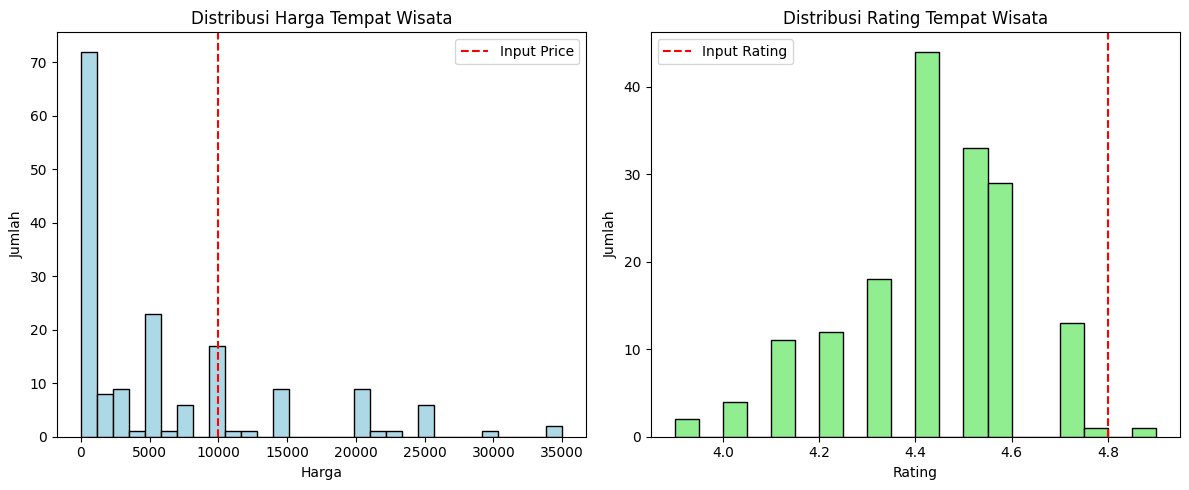

In [ ]:
tfidf = joblib.load('tfidf_vectorizer.pkl')
cosine_sim = joblib.load('cosine_sim_matrix.pkl')
indices = joblib.load('place_indices.pkl')
df_tourism = pd.read_pickle('df_tourism.pkl')

# Simulasi input pengguna (misal ingin tempat kategori 'Cagar Budaya' dengan harga murah dan rating tinggi)
simulated_input = {
    'Place_Name': 'Tempat Simulasi',
    'Category': 'Cagar Budaya',
    'Price': 10000,  # Harga murah
    'Rating': 4.8    # Rating tinggi
}

# Gabungkan fitur seperti saat training
combined_input = (
    simulated_input['Place_Name'] + ' ' +
    simulated_input['Category'].replace('|', ' ') + ' ' +
    str(simulated_input['Price']) + ' ' +
    str(simulated_input['Rating'])
)

# Transformasi input baru
input_vec = tfidf.transform([combined_input])

# Hitung cosine similarity terhadap seluruh data
input_sim = cosine_similarity(input_vec, tfidf.transform(df_tourism['combined_features'])).flatten()

# Ambil top-N
top_n = 10
top_indices = input_sim.argsort()[::-1][1:top_n+1]  # Skip index 0 karena itu diri sendiri

# Hasil rekomendasi
results = df_tourism.iloc[top_indices][['Place_Id', 'Place_Name', 'Category', 'Price', 'Rating', 'Description']]

print("==== Input Pengguna ====")
print(pd.DataFrame([simulated_input]))
print("\n==== Rekomendasi Berdasarkan Input ====")
print(results)

# Visualisasi input user terhadap sebaran harga dan rating
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Harga
axs[0].hist(df_tourism['Price'], bins=30, color='lightblue', edgecolor='black')
axs[0].axvline(simulated_input['Price'], color='red', linestyle='--', label='Input Price')
axs[0].set_title("Distribusi Harga Tempat Wisata")
axs[0].set_xlabel("Harga")
axs[0].set_ylabel("Jumlah")
axs[0].legend()

# Rating
axs[1].hist(df_tourism['Rating'], bins=20, color='lightgreen', edgecolor='black')
axs[1].axvline(simulated_input['Rating'], color='red', linestyle='--', label='Input Rating')
axs[1].set_title("Distribusi Rating Tempat Wisata")
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Jumlah")
axs[1].legend()

plt.tight_layout()
plt.show()


### Simulasi Masukan Pengguna
Nama Tempat: Tempat Simulasi (placeholder, tidak berpengaruh besar karena tidak ada di dataset)
- Kategori: Cagar Budaya
- Harga: Rp10.000 (relatif murah)
- Rating: 4.8 (sangat tinggi)

Masukan ini digunakan untuk mencari tempat wisata serupa berdasarkan kemiripan fitur menggunakan TF-IDF dan cosine similarity.


### 📍 Hasil Rekomendasi Top 10 Tempat Wisata

Berikut adalah 10 tempat yang direkomendasikan berdasarkan kesamaan konten terhadap input pengguna (kategori *Cagar Budaya*, harga murah Rp10.000, dan rating tinggi 4.8):

| No. | Nama Tempat                          | Kategori       | Harga   | Rating |
|-----|--------------------------------------|----------------|---------|--------|
| 1   | Gua Pawon                            | Cagar Alam     | 10.000  | 4.5    |
| 2   | Museum Gunung Merapi                 | Budaya         | 10.000  | 4.4    |
| 3   | Museum Kereta Api Ambarawa           | Budaya         | 10.000  | 4.5    |
| 4   | Taman Sungai Mudal                   | Cagar Alam     | 10.000  | 4.6    |
| 5   | Sendang Geulis Kahuripan             | Cagar Alam     | 10.000  | 4.6    |
| 6   | Curug Tilu Leuwi Opat                | Cagar Alam     | 10.000  | 4.4    |
| 7   | Semarang Contemporary Art Gallery    | Budaya         | 10.000  | 4.5    |
| 8   | Taman Jomblo                         | Taman Hiburan  | 10.000  | 4.5    |
| 9   | Museum Layang-layang                 | Budaya         | 10.000  | 4.4    |
| 10  | Wisata Alam Wana Wisata Penggaron    | Cagar Alam     | 10.000  | 4.1    |

**Catatan**:
- Semua tempat memiliki harga yang sama persis dengan input (Rp10.000).
- Mayoritas tempat berkategori *Cagar Alam* atau *Budaya*, mirip dengan input *Cagar Budaya*.
- Rata-rata rating cukup tinggi (4.1–4.6), mendekati preferensi pengguna yang menginginkan rating 4.8.

Visualisasi distribusi harga dan rating ditampilkan secara terpisah untuk menunjukkan posisi input pengguna dalam keseluruhan data.


### Visualisasi Distribusi Harga & Rating
#### 1. Distribusi Harga
- Distribusi harga menunjukkan mayoritas tempat wisata memiliki harga rendah, bahkan banyak di bawah Rp10.000.
- Garis merah vertikal menandakan harga input (Rp10.000) yang berada sedikit di atas puncak distribusi.
- Artinya, input harga tergolong terjangkau, namun bukan yang termurah.

#### 2. Distribusi Rating
- Rating berkumpul di sekitar nilai 4.3 - 4.5, yang umum untuk tempat wisata.
- Rating input 4.8 berada di sisi kanan ekstrem distribusi (jarang), menunjukkan bahwa pengguna sangat mengutamakan kualitas tinggi.
- Sistem berhasil menyarankan tempat dengan rating cukup tinggi, meskipun tidak banyak tempat yang setara dengan 4.8.

### Kesimpulan
- Sistem CBF telah memberikan rekomendasi yang sangat relevan dengan masukan pengguna.
- Semua tempat dalam hasil memiliki harga yang sesuai dan kategori yang mirip dengan preferensi.
- Rata-rata rating tempat wisata mendekati ekspektasi tinggi pengguna, meskipun tempat dengan rating 4.8 ke atas memang jarang.







